In [103]:
import pandas as pd
import numpy as np
from IPython.display import Markdown
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("../../data/Faker_Data/train.csv")
df.sample(5)

employee_id  age  gender  years_at_company    job_role  monthly_income  \
3166         45499   24  Female                 1       Media            3684   
62023        31542   43    Male                 7  Healthcare            6438   
53487         5280   36    Male                 7       Media            7816   
36155        85943   26  Female                 5  Technology            8147   
48209        34903   34  Female                 6   Education            6348   

      work_life_balance job_satisfaction performance_rating  \
3166          Excellent        Very High            Average   
62023              Good              Low            Average   
53487         Excellent        Very High          Excellent   
36155              Fair           Medium               High   
48209              Poor              Low            Average   

       number_of_promotions  ... job_level  company_size remote_work  \
3166                      0  ...     Entry         Large         Yes   
62023                     2  ...       Mid        Medium          No   
53487                     1  ...       Mid         Large          No   
36155                     1  ...       Mid        Medium         Yes   
48209                     0  ...       Mid        Medium          No   

      leadership_opportunities  innovation_opportunities company_reputation  \
3166                        No                        No               Good   
62023                      Yes                        No               Good   
53487                      Yes                       Yes               Fair   
36155                       No                       Yes               Good   
48209                       No                        No               Fair   

      employee_recognition attrition age_groups age_before_working  
3166                  High    Stayed      18-25                 23  
62023                 High    Stayed      36-45                 36  
53487               Medium    Stayed      36-45                 29  
36155                 High      Left      26-35                 21  
48209                  Low      Left      26-35                 28  

[5 rows x 25 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72000 entries, 0 to 71999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   employee_id               72000 non-null  int64 
 1   age                       72000 non-null  int64 
 2   gender                    72000 non-null  object
 3   years_at_company          72000 non-null  int64 
 4   job_role                  72000 non-null  object
 5   monthly_income            72000 non-null  int64 
 6   work_life_balance         72000 non-null  object
 7   job_satisfaction          72000 non-null  object
 8   performance_rating        72000 non-null  object
 9   number_of_promotions      72000 non-null  int64 
 10  overtime                  72000 non-null  object
 11  distance_from_home        72000 non-null  int64 
 12  education_level           72000 non-null  object
 13  marital_status            72000 non-null  object
 14  number_of_dependents  

In [5]:
df.describe()

employee_id           age  years_at_company  monthly_income  \
count  72000.000000  72000.000000      72000.000000    72000.000000   
mean   45007.817514     37.547014          9.775653     8132.263444   
std    26014.027462      9.727733          8.158286     3972.592533   
min        1.000000     18.000000          0.000000     2410.000000   
25%    22472.750000     31.000000          3.000000     4765.000000   
50%    45005.500000     37.000000          8.000000     7325.000000   
75%    67581.250000     44.000000         15.000000    10338.000000   
max    89999.000000     65.000000         47.000000    19837.000000   

       number_of_promotions  distance_from_home  number_of_dependents  \
count          72000.000000        72000.000000          72000.000000   
mean               1.604347           19.407847              1.433236   
std                1.997811           14.055832              1.378380   
min                0.000000            1.000000              0.000000   
25%                0.000000            9.000000              0.000000   
50%                1.000000           16.000000              1.000000   
75%                2.000000           26.000000              2.000000   
max               16.000000          134.000000              5.000000   

       age_before_working  
count        72000.000000  
mean            27.771361  
std              8.144334  
min             18.000000  
25%             21.000000  
50%             26.000000  
75%             33.000000  
max             65.000000

In [6]:
df.describe(include="object")

gender    job_role work_life_balance job_satisfaction  \
count   72000       72000             72000            72000   
unique      2           5                 4                4   
top      Male  Technology              Good             High   
freq    37289       21392             30372            25039   

       performance_rating overtime    education_level marital_status  \
count               72000    72000              72000          72000   
unique                  4        2                  5              3   
top               Average       No  Bachelor’s Degree        Married   
freq                35997    50919              32084          41463   

       job_level company_size remote_work leadership_opportunities  \
count      72000        72000       72000                    72000   
unique         3            3           2                        2   
top          Mid       Medium          No                       No   
freq       32273        32324       45951                    43650   

       innovation_opportunities company_reputation employee_recognition  \
count                     72000              72000                72000   
unique                        2                  4                    4   
top                          No               Good                 High   
freq                      39423              36388                24065   

       attrition age_groups  
count      72000      72000  
unique         2          5  
top       Stayed      36-45  
freq       48613      26559

In [7]:
df.isna().sum()

employee_id                 0
age                         0
gender                      0
years_at_company            0
job_role                    0
monthly_income              0
work_life_balance           0
job_satisfaction            0
performance_rating          0
number_of_promotions        0
overtime                    0
distance_from_home          0
education_level             0
marital_status              0
number_of_dependents        0
job_level                   0
company_size                0
remote_work                 0
leadership_opportunities    0
innovation_opportunities    0
company_reputation          0
employee_recognition        0
attrition                   0
age_groups                  0
age_before_working          0
dtype: int64

In [8]:
df.select_dtypes(include="object").isin(["None",""," ","NA","Null","none"]).sum()

gender                      0
job_role                    0
work_life_balance           0
job_satisfaction            0
performance_rating          0
overtime                    0
education_level             0
marital_status              0
job_level                   0
company_size                0
remote_work                 0
leadership_opportunities    0
innovation_opportunities    0
company_reputation          0
employee_recognition        0
attrition                   0
age_groups                  0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()

In [12]:
len(df)

72000

### Attrition

In [13]:
df["attrition"].unique()

array(['Left', 'Stayed'], dtype=object)

In [14]:
df["attrition"].describe()

count      72000
unique         2
top       Stayed
freq       48613
Name: attrition, dtype: object

In [15]:
df["attrition"].value_counts()

attrition
Stayed    48613
Left      23387
Name: count, dtype: int64

<Axes: xlabel='attrition', ylabel='count'>

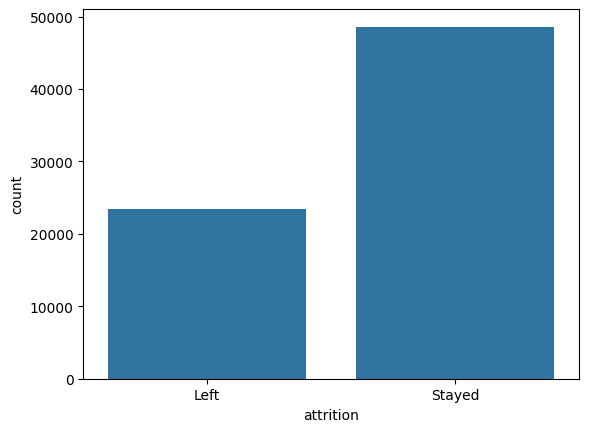

In [16]:
sns.countplot(x="attrition", data=df)

In [17]:
attrition_rate = df["attrition"].value_counts()["Left"] / len(df) * 100
display(Markdown(f"### Attrition rate {attrition_rate}%"))

### Attrition rate 32.481944444444444%

In [18]:
df["years_at_company"].unique()

array([ 0, 13, 16,  6,  3, 12,  1,  2, 26, 20, 19,  9, 21,  7, 40, 28,  8,
       23,  5, 18, 15, 10,  4, 11, 22, 25, 27, 30, 14, 24, 29, 17, 33, 35,
       32, 31, 37, 38, 45, 34, 41, 42, 44, 39, 36, 43, 46, 47])

In [19]:
df = df[~((df["years_at_company"] == 0) & (df.age > 45))]

In [20]:
df["years_at_company"].describe()

count    71569.000000
mean         9.834523
std          8.147361
min          0.000000
25%          3.000000
50%          8.000000
75%         15.000000
max         47.000000
Name: years_at_company, dtype: float64

In [21]:
df["years_at_company"].mode()

0    0
Name: years_at_company, dtype: int64

In [22]:
df["years_at_company"].value_counts()

years_at_company
0     6256
1     4586
2     4301
3     3996
4     3871
5     3755
6     3636
7     3424
8     3282
9     3063
10    2920
11    2744
12    2599
13    2398
14    2307
15    2083
16    1901
17    1743
18    1655
19    1422
20    1245
21    1176
22    1076
23    1029
24     747
25     734
26     580
27     533
28     446
29     374
30     315
31     295
32     217
34     166
33     164
35     121
36     101
37      82
38      59
39      47
40      33
41      23
42      18
43      14
44      11
45       8
46       8
47       5
Name: count, dtype: int64

In [23]:
display(df.loc[df["attrition"] == "Left", "years_at_company"].describe()) # left employees
display(df.loc[df["attrition"] == "Stayed", "years_at_company"].describe()) # Stayed employees

count    23222.000000
mean         9.465335
std          8.017845
min          0.000000
25%          3.000000
50%          8.000000
75%         14.000000
max         47.000000
Name: years_at_company, dtype: float64

count    48347.000000
mean        10.011852
std          8.203020
min          0.000000
25%          3.000000
50%          8.000000
75%         15.000000
max         47.000000
Name: years_at_company, dtype: float64

<Axes: xlabel='years_at_company', ylabel='Count'>

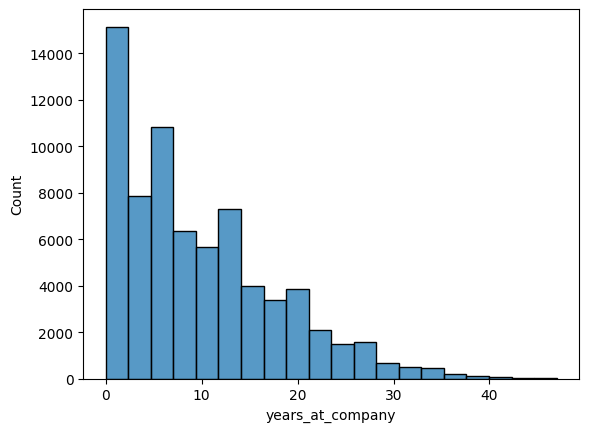

In [24]:
sns.histplot(df["years_at_company"], bins=20)

In [25]:
attrition_rate_each_year = {}
for i in df["years_at_company"].unique():
    rate = len(df.loc[(df["attrition"] == "Left") & (df["years_at_company"] == i)]) / len(df[df["years_at_company"] == i])
    attrition_rate_each_year[int(i)] = rate

In [26]:
top10_attrition_rates = dict(sorted(attrition_rate_each_year.items(), key=lambda x: x[1], reverse=True)[:10])
top10_attrition_rates

{44: 0.45454545454545453,
 39: 0.425531914893617,
 2: 0.3678214368751453,
 5: 0.351797603195739,
 0: 0.35134271099744246,
 41: 0.34782608695652173,
 35: 0.34710743801652894,
 1: 0.3440907108591365,
 6: 0.3388338833883388,
 7: 0.33703271028037385}

In [27]:
bot10_attrition_rates = dict(sorted(attrition_rate_each_year.items(), key=lambda x: x[1])[:10])
bot10_attrition_rates

{42: 0.16666666666666666,
 47: 0.2,
 38: 0.23728813559322035,
 45: 0.25,
 46: 0.25,
 30: 0.2698412698412698,
 33: 0.27439024390243905,
 37: 0.2804878048780488,
 20: 0.28353413654618476,
 43: 0.2857142857142857}

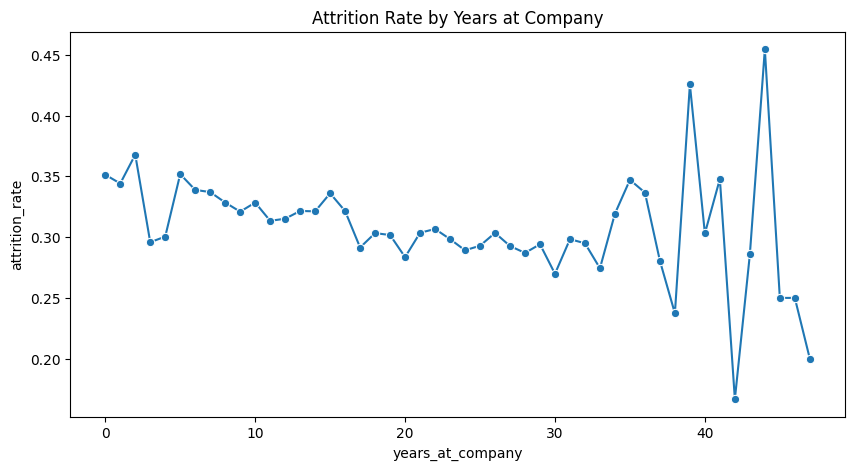

In [28]:
df_attr = pd.DataFrame(list(attrition_rate_each_year.items()), columns=["years_at_company", "attrition_rate"])

plt.figure(figsize=(10,5))
sns.lineplot(x="years_at_company", y="attrition_rate", data=df_attr, marker='o')
plt.title("Attrition Rate by Years at Company")
plt.show()


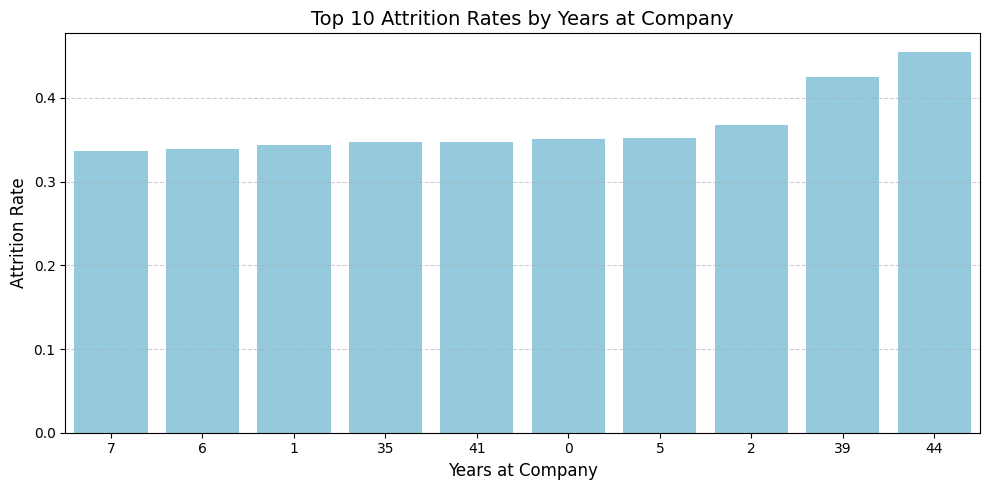

In [29]:
df_top10 = pd.DataFrame(list(top10_attrition_rates.items()), columns=["years_at_company", "attrition_rate"])
df_top10 = df_top10.sort_values("attrition_rate", ascending= False)

plt.figure(figsize=(10,5))
sns.barplot(data=df_top10, x="years_at_company", y="attrition_rate", color="skyblue", order=df_top10.sort_values("attrition_rate")["years_at_company"])

plt.title("Top 10 Attrition Rates by Years at Company", fontsize=14)
plt.xlabel("Years at Company", fontsize=12)
plt.ylabel("Attrition Rate", fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


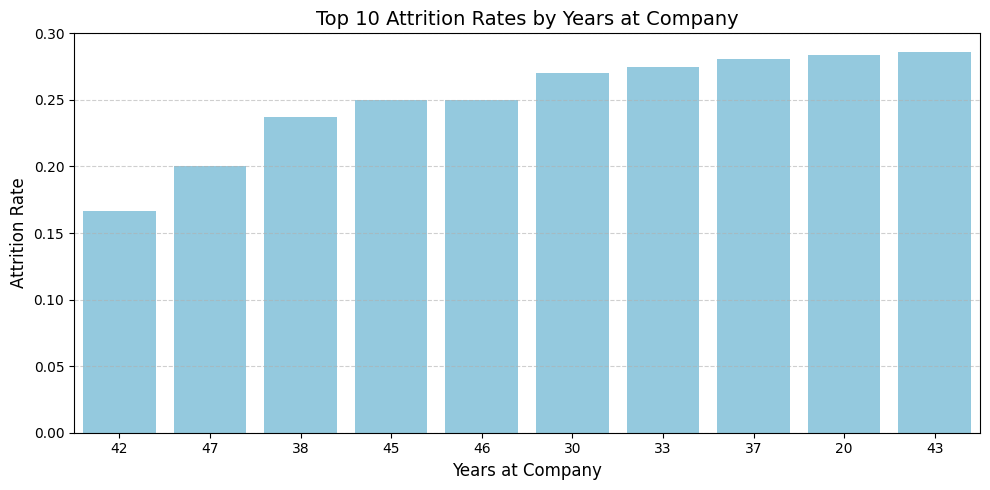

In [30]:
df_least10 = pd.DataFrame(list(bot10_attrition_rates.items()), columns=["years_at_company", "attrition_rate"])
df_least10 = df_least10.sort_values("attrition_rate", ascending= False)

plt.figure(figsize=(10,5))
sns.barplot(data=df_least10, x="years_at_company", y="attrition_rate", color="skyblue", order=df_least10.sort_values("attrition_rate")["years_at_company"])

plt.title("Top 10 Attrition Rates by Years at Company", fontsize=14)
plt.xlabel("Years at Company", fontsize=12)
plt.ylabel("Attrition Rate", fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### Insights
* The highest attrition rate is on 39 years at company
* The lowest attrition rate is on 47 years at company
* The Attrition rate tend to get decrease as the years at company increase but there is points that the attrition gets high

### Monthly Income

In [31]:
df["monthly_income"].describe()

count    71569.000000
mean      8154.795791
std       3972.528039
min       2410.000000
25%       4798.000000
50%       7345.000000
75%      10384.000000
max      19837.000000
Name: monthly_income, dtype: float64

In [32]:
income_decribtion_with_attrition = df.groupby(["attrition"])["monthly_income"].describe()
income_decribtion_with_attrition

count         mean          std     min      25%     50%  \
attrition                                                               
Left       23222.0  7885.881836  3896.737016  2413.0  4649.25  7131.5   
Stayed     48347.0  8283.960370  4002.043505  2410.0  4900.00  7448.0   

                75%      max  
attrition                     
Left        9783.75  19837.0  
Stayed     10721.50  19835.0

In [33]:
bins = [0, 3000, 6000, 9000, 12000, df["monthly_income"].max()]
income_labels = ["Very Low", "Low", "Medium", "High", "Very High"]

df["income_band"] = pd.cut(df["monthly_income"], bins=bins, labels=income_labels, include_lowest=True)
income_order = ["Very High", "High", "Medium", "Low", "Very Low"]
df["income_band"] = pd.Categorical(df["income_band"], categories=income_order, ordered=True)

# Check counts
df["income_band"].value_counts().sort_index(ascending=False)


income_band
Very Low      1346
Low          23279
Medium       24130
High          8329
Very High    14485
Name: count, dtype: int64

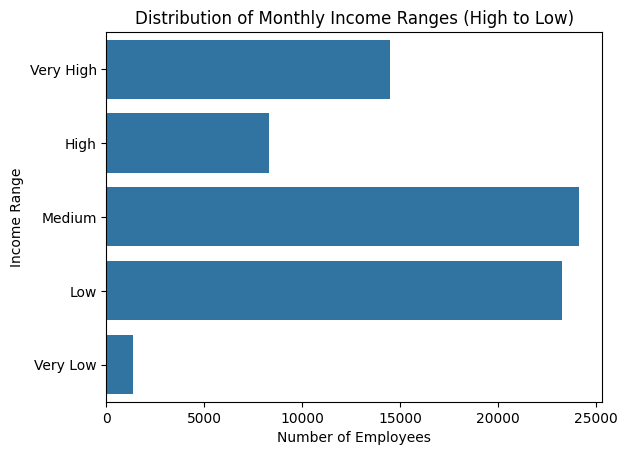

In [34]:
sns.countplot(y="income_band", data=df, order=income_order)
plt.title("Distribution of Monthly Income Ranges (High to Low)")
plt.xlabel("Number of Employees")
plt.ylabel("Income Range")
plt.show()


In [35]:
attrition_rate_per_income_band = {}
for i in income_labels:
    rate = len(df.loc[(df["attrition"] == "Left") & (df["income_band"] == i)]) / len(df[df["income_band"] == i])
    attrition_rate_per_income_band[i] = rate

attrition_rate_per_income_band

{'Very Low': 0.45988112927191677,
 'Low': 0.3552558099574724,
 'Medium': 0.3096560298383755,
 'High': 0.3250090046824349,
 'Very High': 0.2867794269934415}

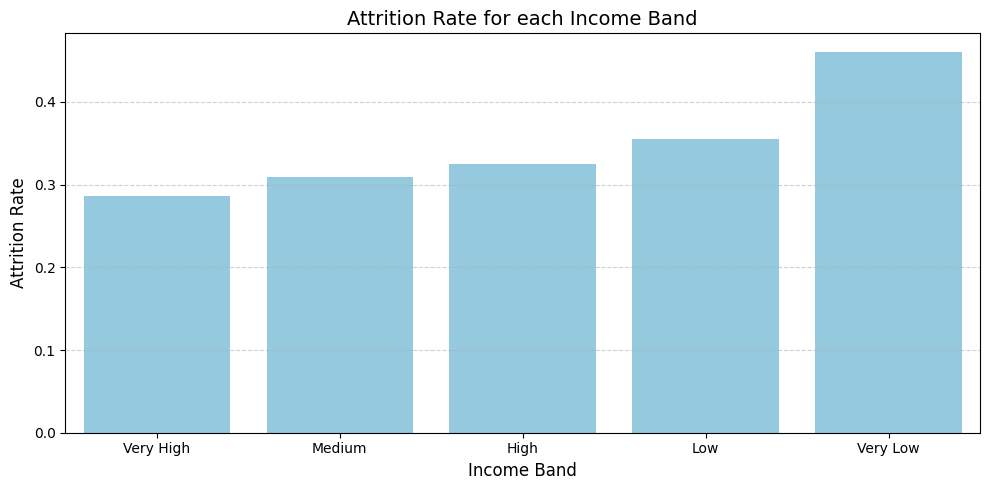

In [36]:
df_attr_income = pd.DataFrame(list(attrition_rate_per_income_band.items()), columns=["income_band", "attrition_rate"])
df_attr_income = df_attr_income.sort_values("attrition_rate", ascending= False)

plt.figure(figsize=(10,5))
sns.barplot(data=df_attr_income, x="income_band", y="attrition_rate", color="skyblue", order=df_attr_income.sort_values("attrition_rate")["income_band"])

plt.title("Attrition Rate for each Income Band", fontsize=14)
plt.xlabel("Income Band", fontsize=12)
plt.ylabel("Attrition Rate", fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

##### The Attrition Rate Increases as the income deacreases

### Job Role

In [37]:
df["job_role"].unique()

array(['Healthcare', 'Finance', 'Technology', 'Education', 'Media'],
      dtype=object)

In [38]:
df["job_role"].describe()

count          71569
unique             5
top       Technology
freq           21268
Name: job_role, dtype: object

In [39]:
job_role_count = df["job_role"].value_counts()
job_role_count

job_role
Technology    21268
Healthcare    17785
Finance       14364
Education     10769
Media          7383
Name: count, dtype: int64

In [40]:
job_role_count = dict(job_role_count)
for i in job_role_count:
    job_role_count[i] = int(job_role_count[i])

job_role_count

{'Technology': 21268,
 'Healthcare': 17785,
 'Finance': 14364,
 'Education': 10769,
 'Media': 7383}

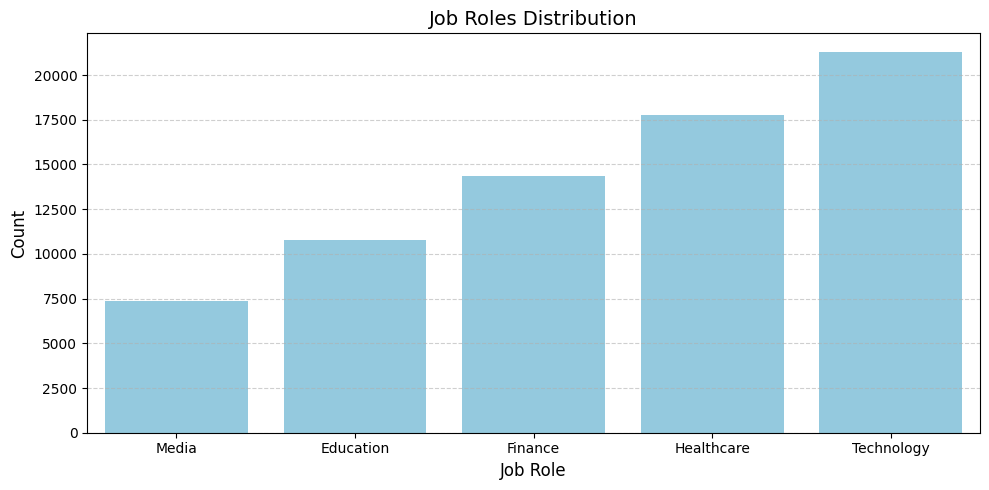

In [41]:
df_job_role_count = pd.DataFrame(list(job_role_count.items()), columns=["job_role", "count"])
df_job_role_count = df_job_role_count.sort_values("count", ascending= False)

plt.figure(figsize=(10,5))
sns.barplot(data=df_job_role_count, x="job_role", y="count", color="skyblue", order=df_job_role_count.sort_values("count")["job_role"])

plt.title("Job Roles Distribution", fontsize=14)
plt.xlabel("Job Role", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [42]:
attrition_rate_per_job_role = {}
for i in df["job_role"].unique():
    rate = len(df.loc[(df["attrition"] == "Left") & (df["job_role"] == i)]) / len(df[df["job_role"] == i])
    attrition_rate_per_job_role[i] = rate

attrition_rate_per_job_role

{'Healthcare': 0.3120607253303346,
 'Finance': 0.31084656084656087,
 'Technology': 0.3228794432950912,
 'Education': 0.3598291391958399,
 'Media': 0.3338751185155086}

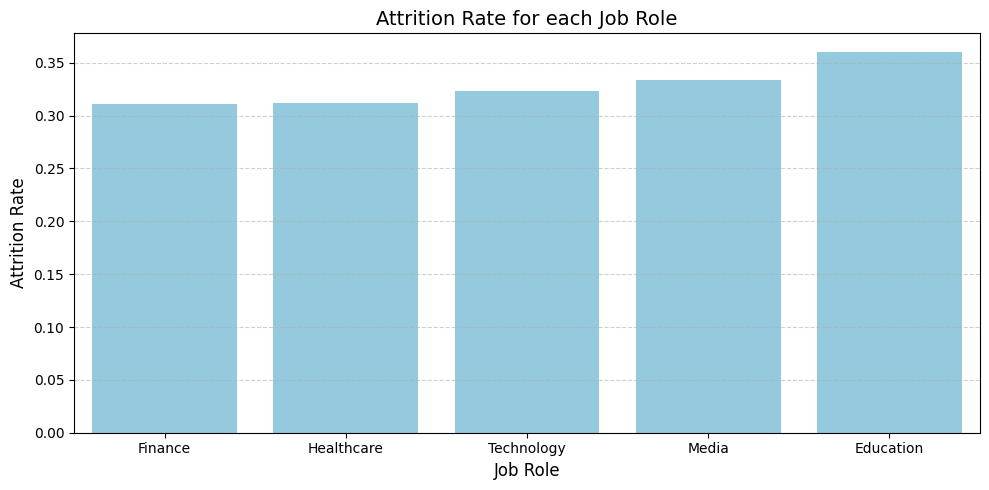

In [43]:
df_attr_job_role = pd.DataFrame(list(attrition_rate_per_job_role.items()), columns=["job_role", "attrition_rate"])
df_attr_job_role = df_attr_job_role.sort_values("attrition_rate", ascending= False)

plt.figure(figsize=(10,5))
sns.barplot(data=df_attr_job_role, x="job_role", y="attrition_rate", color="skyblue", order=df_attr_job_role.sort_values("attrition_rate")["job_role"])

plt.title("Attrition Rate for each Job Role", fontsize=14)
plt.xlabel("Job Role", fontsize=12)
plt.ylabel("Attrition Rate", fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

* The technology sectory has the highest employees with <b style = "color: skyblue">24296</b> which is <b style = "color: skyblue">29.8%</b> of all employees
* And the media has <b style = "color: skyblue">8334</b> which is the lowest with <b style = "color: skyblue">10%</b>
##### 
* The highest attrition rate is in the Education level with <b style = "color: skyblue">36.3%</b>
* And the lowest is in the Healthcare with <b style = "color: skyblue">31%</b>

In [44]:
df["work_life_balance"].describe()

count     71569
unique        4
top        Good
freq      30185
Name: work_life_balance, dtype: object

In [45]:
work_life_balance_count = df["work_life_balance"].value_counts()
work_life_balance_count

work_life_balance
Good         30185
Poor         14203
Fair         14172
Excellent    13009
Name: count, dtype: int64

In [46]:
work_life_balance_count = dict(work_life_balance_count)
for i in work_life_balance_count:
    work_life_balance_count[i] = int(work_life_balance_count[i])

work_life_balance_count

{'Good': 30185, 'Poor': 14203, 'Fair': 14172, 'Excellent': 13009}

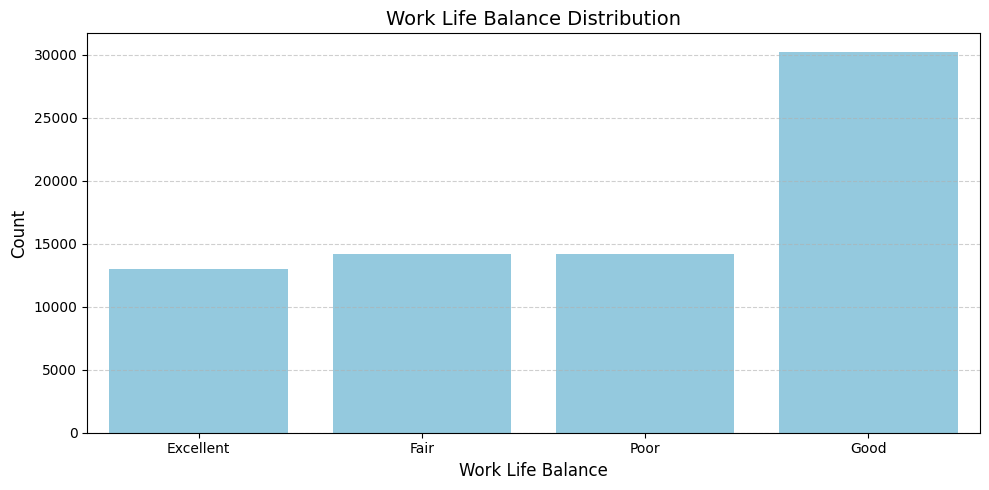

In [47]:
df_work_life_balance_count = pd.DataFrame(list(work_life_balance_count.items()), columns=["work_life_balance", "count"])
df_work_life_balance_count = df_work_life_balance_count.sort_values("count", ascending= False)

plt.figure(figsize=(10,5))
sns.barplot(data=df_work_life_balance_count, x="work_life_balance", y="count", color="skyblue", order=df_work_life_balance_count.sort_values("count")["work_life_balance"])

plt.title("Work Life Balance Distribution", fontsize=14)
plt.xlabel("Work Life Balance", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [48]:
attrition_rate_per_work_life_balance = {}
for i in df["work_life_balance"].unique():
    rate = len(df.loc[(df["attrition"] == "Left") & (df["work_life_balance"] == i)]) / len(df[df["work_life_balance"] == i])
    attrition_rate_per_work_life_balance[i] = rate

attrition_rate_per_work_life_balance

{'Poor': 0.858691825670633,
 'Good': 0.10969024349842638,
 'Fair': 0.5018346034434096,
 'Excellent': 0.04635252517487893}

In [49]:
df.groupby(["work_life_balance"])["attrition"].describe()

count unique     top   freq
work_life_balance                             
Excellent          13009      2  Stayed  12406
Fair               14172      2    Left   7112
Good               30185      2  Stayed  26874
Poor               14203      2    Left  12196

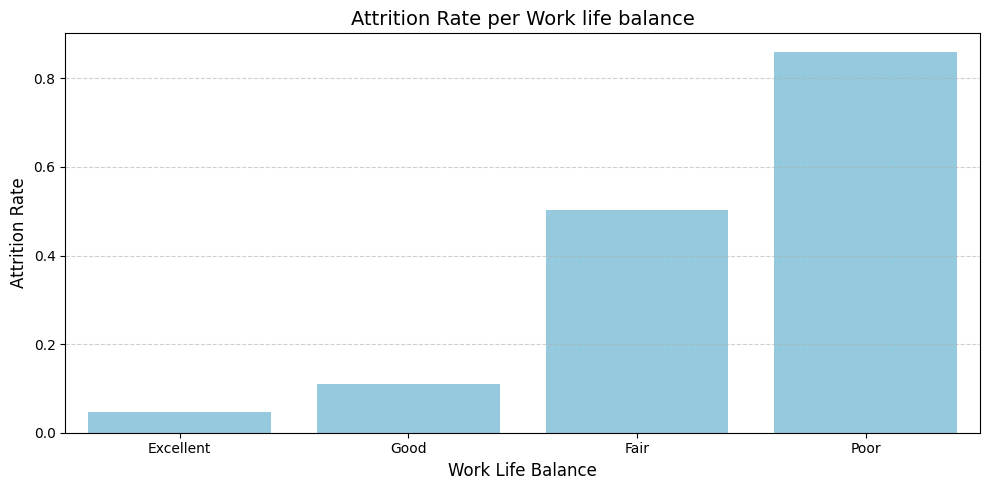

In [50]:
df_attr_rate_per_work_life_balance = pd.DataFrame(list(attrition_rate_per_work_life_balance.items()), columns=["work_life_balance", "attrition_rate"])
df_attr_rate_per_work_life_balance = df_attr_rate_per_work_life_balance.sort_values("attrition_rate", ascending= False)

plt.figure(figsize=(10,5))
sns.barplot(data=df_attr_rate_per_work_life_balance, x="work_life_balance", y="attrition_rate", color="skyblue", order=df_attr_rate_per_work_life_balance.sort_values("attrition_rate")["work_life_balance"])

plt.title("Attrition Rate per Work life balance", fontsize=14)
plt.xlabel("Work Life Balance", fontsize=12)
plt.ylabel("Attrition Rate", fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

* The Attrition Rate increasing as the employee can not balance between the personal life work
* Employees with <b>Poor</b> life balance has attrition rate to <b style = "color : skyblue">86%</b> and <b>Fair</b> life balance <b style = "color : skyblue">49.8%</b>

### Job Satisfaction

In [51]:
df["job_satisfaction"].unique()

array(['Low', 'Medium', 'Very High', 'High'], dtype=object)

In [52]:
job_satisfaction_count = df["job_satisfaction"].value_counts()
job_satisfaction_count

job_satisfaction
High         24893
Medium       15814
Low          15684
Very High    15178
Name: count, dtype: int64

In [53]:
job_satisfaction_count = dict(job_satisfaction_count)
for i in job_satisfaction_count:
    job_satisfaction_count[i] = int(job_satisfaction_count[i])

job_satisfaction_count

{'High': 24893, 'Medium': 15814, 'Low': 15684, 'Very High': 15178}

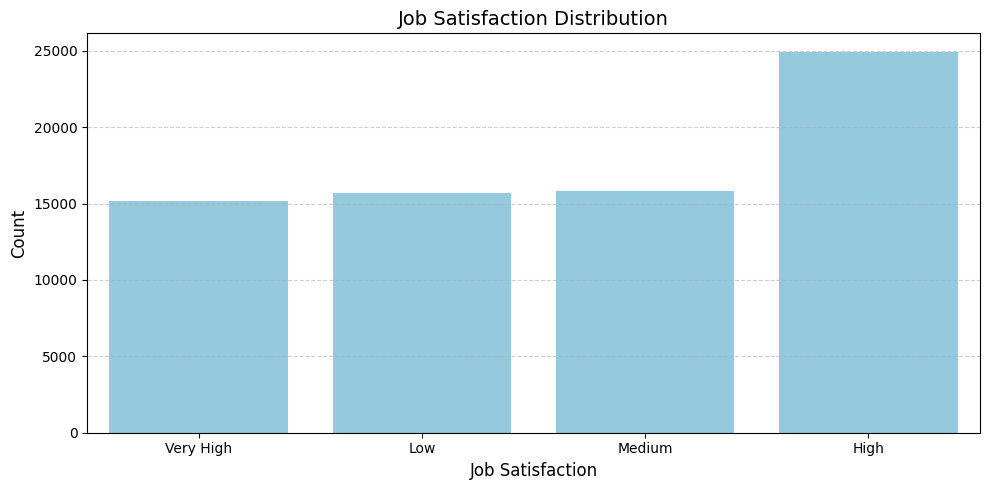

In [54]:
df_job_satisfaction_count = pd.DataFrame(list(job_satisfaction_count.items()), columns=["job_satisfaction", "count"])
df_job_satisfaction_count = df_job_satisfaction_count.sort_values("count", ascending= False)

plt.figure(figsize=(10,5))
sns.barplot(data=df_job_satisfaction_count, x="job_satisfaction", y="count", color="skyblue", order=df_job_satisfaction_count.sort_values("count")["job_satisfaction"])

plt.title("Job Satisfaction Distribution", fontsize=14)
plt.xlabel("Job Satisfaction", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [55]:
attrition_rate_per_job_satisfaction = {}
for i in df["job_satisfaction"].unique():
    rate = len(df.loc[(df["attrition"] == "Left") & (df["job_satisfaction"] == i)]) / len(df[df["job_satisfaction"] == i])
    attrition_rate_per_job_satisfaction[i] = rate

attrition_rate_per_job_satisfaction

{'Low': 0.8639377709767916,
 'Medium': 0.4573163020108764,
 'Very High': 0.019370140993543287,
 'High': 0.08620897441047684}

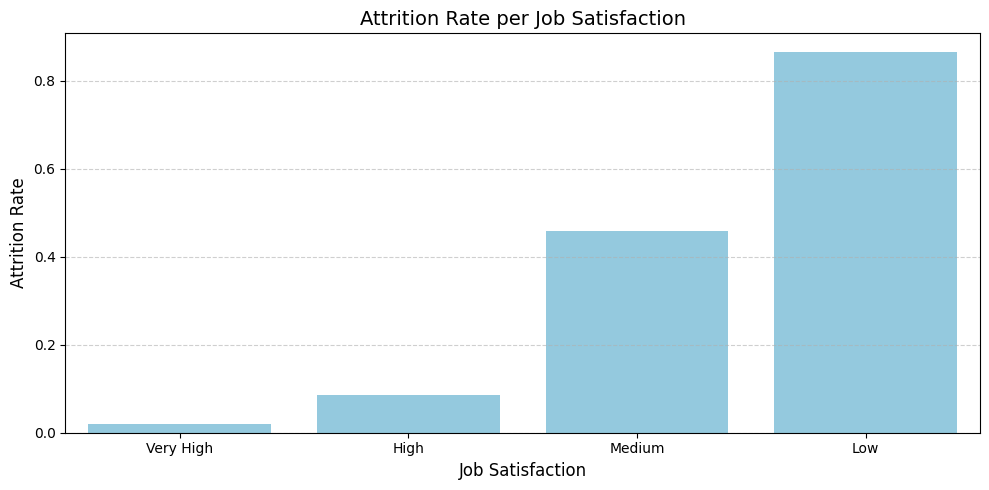

In [56]:
df_attrition_rate_per_job_satisfaction = pd.DataFrame(list(attrition_rate_per_job_satisfaction.items()), columns=["job_satisfaction", "attrition_rate"])
df_attrition_rate_per_job_satisfaction = df_attrition_rate_per_job_satisfaction.sort_values("attrition_rate", ascending= False)

plt.figure(figsize=(10,5))
sns.barplot(data=df_attrition_rate_per_job_satisfaction, x="job_satisfaction", y="attrition_rate", color="skyblue", order=df_attrition_rate_per_job_satisfaction.sort_values("attrition_rate")["job_satisfaction"])

plt.title("Attrition Rate per Job Satisfaction", fontsize=14)
plt.xlabel("Job Satisfaction", fontsize=12)
plt.ylabel("Attrition Rate", fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

* The employees that has low job satisfaction tend to has high attrition rate <b>Low and Medium </b>satisfaction has 
<b style = "color :skyblue"> 86.1%, 45.2% </b> respectivly

### Performance Rating

In [57]:
performance_rating_count = df["performance_rating"].value_counts()
performance_rating_count

performance_rating
Average      35795
High         21535
Excellent     7214
Low           7025
Name: count, dtype: int64

In [58]:
performance_rating_count = dict(performance_rating_count)
for i in performance_rating_count:
    performance_rating_count[i] = int(performance_rating_count[i])

performance_rating_count

{'Average': 35795, 'High': 21535, 'Excellent': 7214, 'Low': 7025}

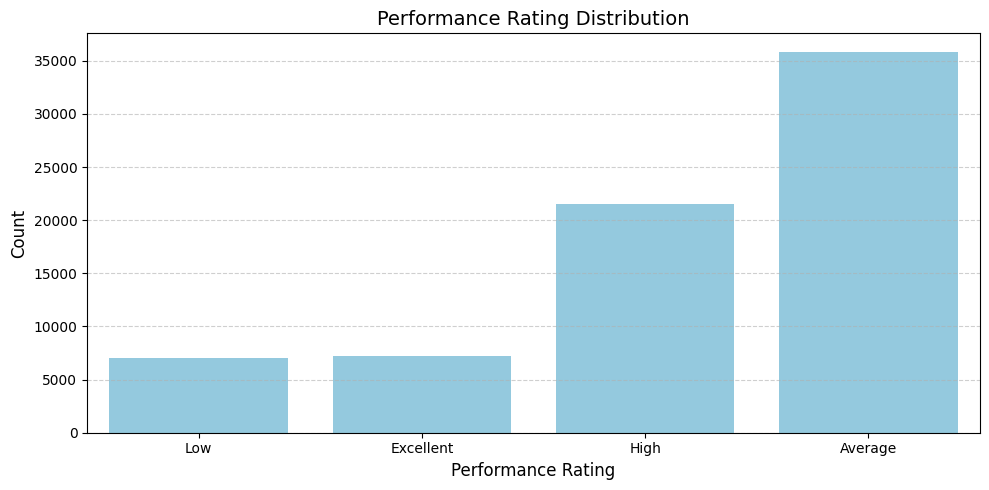

In [59]:
df_performance_rating_count = pd.DataFrame(list(performance_rating_count.items()), columns=["performance_rating", "count"])
df_performance_rating_count = df_performance_rating_count.sort_values("count", ascending= False)

plt.figure(figsize=(10,5))
sns.barplot(data=df_performance_rating_count, x="performance_rating", y="count", color="skyblue", order=df_performance_rating_count.sort_values("count")["performance_rating"])

plt.title("Performance Rating Distribution", fontsize=14)
plt.xlabel("Performance Rating", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [60]:
attrition_rate_per_performance_rating = {}
for i in df["performance_rating"].unique():
    rate = len(df.loc[(df["attrition"] == "Left") & (df["performance_rating"] == i)]) / len(df[df["performance_rating"] == i])
    attrition_rate_per_performance_rating[i] = rate

attrition_rate_per_performance_rating

{'Average': 0.3240955440704009,
 'Excellent': 0.3221513723315775,
 'High': 0.3254237288135593,
 'Low': 0.32583629893238436}

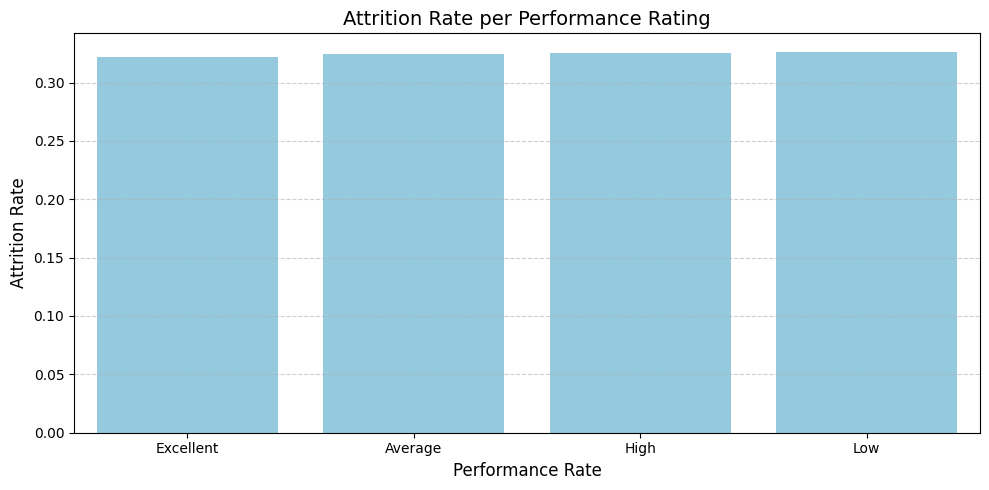

In [61]:
df_attrition_rate_per_performance_rating = pd.DataFrame(list(attrition_rate_per_performance_rating.items()), columns=["performance_rating", "attrition_rate"])
df_attrition_rate_per_performance_rating = df_attrition_rate_per_performance_rating.sort_values("attrition_rate", ascending= False)

plt.figure(figsize=(10,5))
sns.barplot(data=df_attrition_rate_per_performance_rating, x="performance_rating", y="attrition_rate", color="skyblue", order=df_attrition_rate_per_performance_rating.sort_values("attrition_rate")["performance_rating"])

plt.title("Attrition Rate per Performance Rating", fontsize=14)
plt.xlabel("Performance Rate", fontsize=12)
plt.ylabel("Attrition Rate", fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

* The performance has no impact on the attrition rate all of them has <b style = "color : skyblue"> 32% </b> attrition rate

In [62]:
overtime_count = df["overtime"].value_counts()
overtime_count

overtime
No     50604
Yes    20965
Name: count, dtype: int64

In [63]:
overtime_count = dict(overtime_count)
for i in overtime_count:
    overtime_count[i] = int(overtime_count[i])

overtime_count

{'No': 50604, 'Yes': 20965}

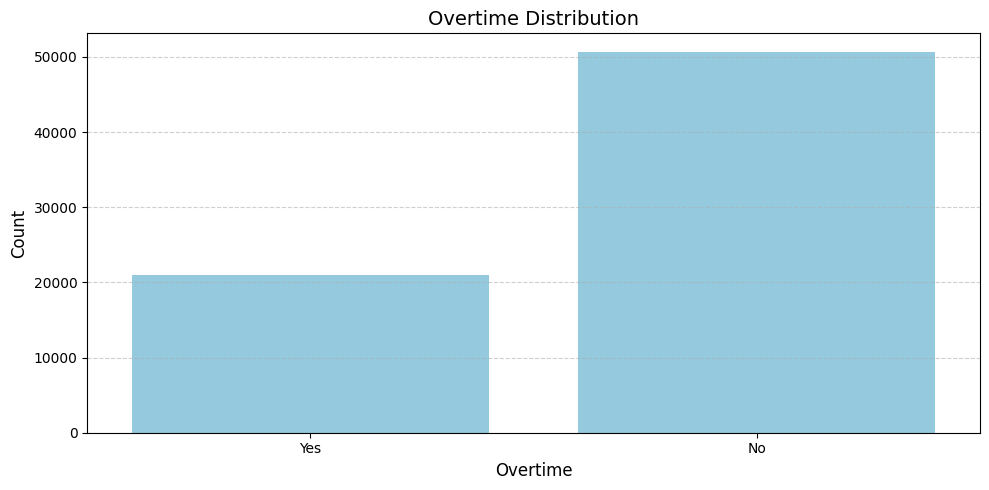

In [64]:
df_overtime_count = pd.DataFrame(list(overtime_count.items()), columns=["overtime", "count"])
df_overtime_count = df_overtime_count.sort_values("count", ascending= False)

plt.figure(figsize=(10,5))
sns.barplot(data=df_overtime_count, x="overtime", y="count", color="skyblue", order=df_overtime_count.sort_values("count")["overtime"])

plt.title("Overtime Distribution", fontsize=14)
plt.xlabel("Overtime", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [65]:
attrition_rate_overtime = {}
for i in df["overtime"].unique():
    rate = len(df.loc[(df["attrition"] == "Left") & (df["overtime"] == i)]) / len(df[df["overtime"] == i])
    attrition_rate_overtime[i] = rate

attrition_rate_overtime

{'Yes': 0.6564273789649415, 'No': 0.18694174373567307}

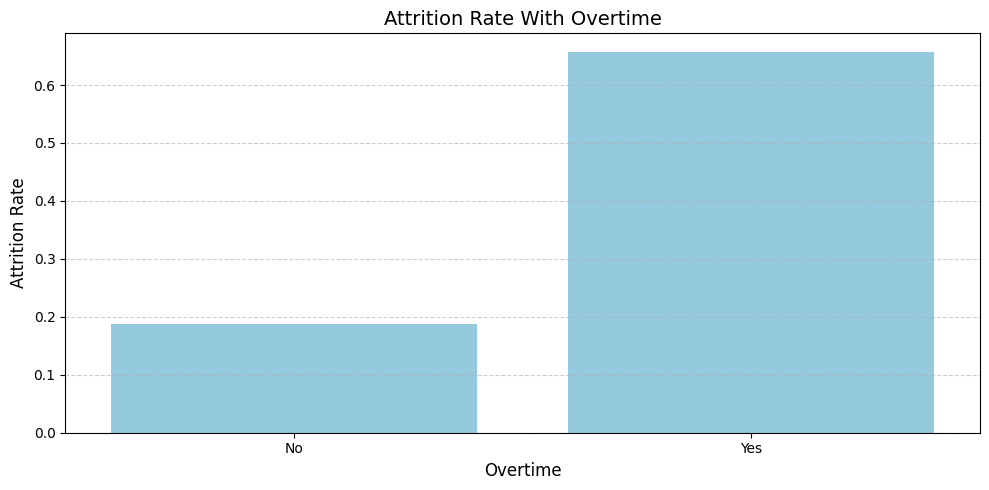

In [66]:
df_attrition_rate_overtime = pd.DataFrame(list(attrition_rate_overtime.items()), columns=["overtime", "attrition_rate"])
df_attrition_rate_overtime = df_attrition_rate_overtime.sort_values("attrition_rate", ascending= False)

plt.figure(figsize=(10,5))
sns.barplot(data=df_attrition_rate_overtime, x="overtime", y="attrition_rate", color="skyblue", order=df_attrition_rate_overtime.sort_values("attrition_rate")["overtime"])

plt.title("Attrition Rate With Overtime", fontsize=14)
plt.xlabel("Overtime", fontsize=12)
plt.ylabel("Attrition Rate", fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

* The employees who work over time has attrition rate <b style = "color : skyblue"> 65.4% </b>

### Job level

In [67]:
df["job_level"].describe()

count     71569
unique        3
top         Mid
freq      32226
Name: job_level, dtype: object

In [68]:
df["job_level"].value_counts()

job_level
Mid       32226
Entry     20550
Senior    18793
Name: count, dtype: int64

In [69]:
df.groupby([ "attrition","job_level", "performance_rating"])["employee_id"].count()

attrition  job_level  performance_rating
Left       Entry      Average                3534
                      Excellent               717
                      High                   2171
                      Low                     705
           Mid        Average                5242
                      Excellent              1051
                      High                   3101
                      Low                    1063
           Senior     Average                2825
                      Excellent               556
                      High                   1736
                      Low                     521
Stayed     Entry      Average                6712
                      Excellent              1375
                      High                   3960
                      Low                    1376
           Mid        Average               10891
                      Excellent              2200
                      High                   6589
         

In [70]:
display(df.groupby([ "job_level","attrition"])["employee_id"].count())

job_level  attrition
Entry      Left          7127
           Stayed       13423
Mid        Left         10457
           Stayed       21769
Senior     Left          5638
           Stayed       13155
Name: employee_id, dtype: int64

### Distance from Home

In [71]:
df.distance_from_home.describe()

count    71569.000000
mean        19.411016
std         14.059812
min          1.000000
25%          9.000000
50%         16.000000
75%         26.000000
max        134.000000
Name: distance_from_home, dtype: float64

In [72]:
df.groupby(["job_role"])["distance_from_home"].describe()

count       mean        std  min  25%   50%   75%    max
job_role                                                              
Education   10769.0  19.396137  14.242357  1.0  9.0  16.0  26.0  121.0
Finance     14364.0  19.307226  13.871822  1.0  9.0  16.0  26.0  121.0
Healthcare  17785.0  19.358729  14.051567  1.0  9.0  16.0  26.0  125.0
Media        7383.0  19.427739  14.175331  1.0  9.0  16.0  26.0  132.0
Technology  21268.0  19.526566  14.060028  1.0  9.0  16.0  27.0  134.0

In [73]:
df.groupby(["attrition"])["distance_from_home"].describe()

count       mean        std  min  25%   50%   75%    max
attrition                                                            
Left       23222.0  19.439885  14.059658  1.0  9.0  16.0  26.0  132.0
Stayed     48347.0  19.397150  14.060010  1.0  9.0  16.0  26.0  134.0

In [74]:
df.groupby(["performance_rating"])["distance_from_home"].describe()

count       mean        std  min  25%   50%   75%    max
performance_rating                                                            
Average             35795.0  19.428775  14.097061  1.0  9.0  16.0  26.0  134.0
Excellent            7214.0  19.210701  13.831960  1.0  9.0  16.0  26.0  125.0
High                21535.0  19.433341  14.091552  1.0  9.0  16.0  26.0  132.0
Low                  7025.0  19.457794  14.005652  1.0  9.0  16.0  26.0  116.0

### Education Level

### Marital Status

In [75]:
df.groupby(["marital_status", "remote_work"])["employee_id"].count()

marital_status  remote_work
Divorced        No              5674
                Yes             3228
Married         No             26398
                Yes            14790
Single          No             13608
                Yes             7871
Name: employee_id, dtype: int64

In [76]:
df.groupby(["marital_status", "gender", "remote_work"])["employee_id"].count()

marital_status  gender  remote_work
Divorced        Female  No              2691
                        Yes             1540
                Male    No              2983
                        Yes             1688
Married         Female  No             12715
                        Yes             7190
                Male    No             13683
                        Yes             7600
Single          Female  No              6601
                        Yes             3777
                Male    No              7007
                        Yes             4094
Name: employee_id, dtype: int64

In [77]:
df["remote_work"].value_counts()

remote_work
No     45680
Yes    25889
Name: count, dtype: int64

In [78]:
df.groupby(["marital_status", "attrition"])["employee_id"].count()

marital_status  attrition
Divorced        Left          2830
                Stayed        6072
Married         Left         13277
                Stayed       27911
Single          Left          7115
                Stayed       14364
Name: employee_id, dtype: int64

In [79]:
if "company_tenure" in df.columns:
    df.drop(columns="company_tenure", inplace=True)

In [80]:
df.groupby(["attrition", "leadership_opportunities"])["employee_id"].count()

attrition  leadership_opportunities
Left       No                          14661
           Yes                          8561
Stayed     No                          28569
           Yes                         19778
Name: employee_id, dtype: int64

In [81]:
df["leadership_opportunities"].value_counts()

leadership_opportunities
No     43230
Yes    28339
Name: count, dtype: int64

In [82]:
df.groupby(["attrition", "company_size"])["employee_id"].count()

attrition  company_size
Left       Large            7871
           Medium          10425
           Small            4926
Stayed     Large           17269
           Medium          21711
           Small            9367
Name: employee_id, dtype: int64

In [83]:
df["company_size"].value_counts()

company_size
Medium    32136
Large     25140
Small     14293
Name: count, dtype: int64

In [84]:
df.groupby(["company_size"])["years_at_company"].mean()

company_size
Large     9.800835
Medium    9.825398
Small     9.914294
Name: years_at_company, dtype: float64

In [85]:
df.groupby(["company_size", "overtime"])["employee_id"].count()

company_size  overtime
Large         No          17725
              Yes          7415
Medium        No          22747
              Yes          9389
Small         No          10132
              Yes          4161
Name: employee_id, dtype: int64

In [86]:
df.groupby(["attrition", "innovation_opportunities"])["employee_id"].count()

attrition  innovation_opportunities
Left       No                          12747
           Yes                         10475
Stayed     No                          26443
           Yes                         21904
Name: employee_id, dtype: int64

In [87]:
df.groupby(["age_groups", "job_level"]).size()

age_groups  job_level
18-25       Entry         7479
            Mid            804
26-35       Entry         6938
            Mid          13446
            Senior        1736
36-45       Entry         4949
            Mid          12580
            Senior        9030
46-55       Entry         1001
            Mid           4532
            Senior        6594
55+         Entry          183
            Mid            864
            Senior        1433
dtype: int64

In [88]:
df["age_before_working"] = df["age"] - df["years_at_company"]
df["age_before_working"].unique()

array([20, 21, 28, 31, 35, 27, 25, 39, 24, 41, 29, 32, 23, 30, 19, 34, 44,
       36, 22, 33, 26, 18, 43, 47, 42, 38, 53, 37, 45, 40, 48, 55, 49, 46,
       61, 64, 52, 56, 50, 51, 54, 57, 63, 58, 59, 62, 60])

## Visualisation

/tmp/ipykernel_4675/3000317583.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


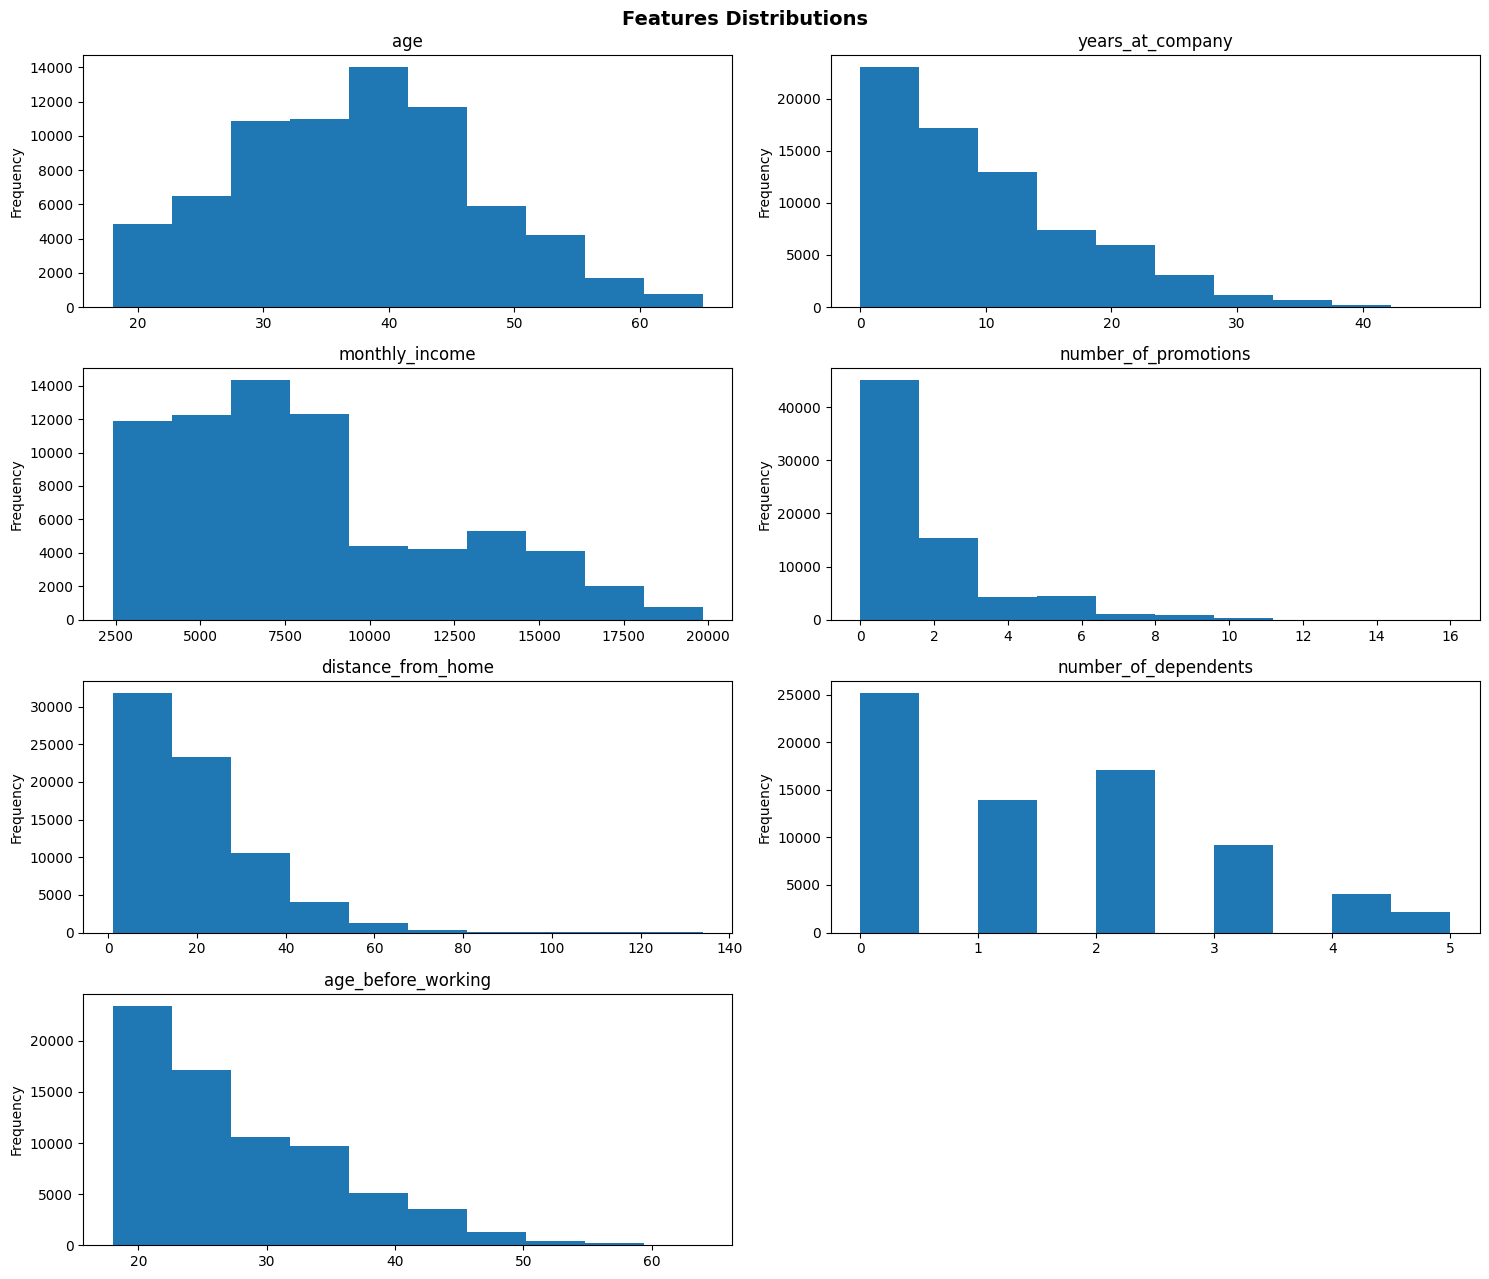

In [89]:
df_plotting =df.select_dtypes(include='number').drop(columns= ["employee_id"])
fig = plt.figure(figsize=(15, 13))
for i, column in enumerate(df_plotting.columns, 1):
    plt.subplot(4, 2, i)
    df[column].plot(kind='hist')
    plt.title(column)
    plt.xticks(rotation = 0)
    plt.tight_layout()

fig.suptitle("Features Distributions", fontsize = 14, weight = "bold")
fig.tight_layout()
fig.show()

/tmp/ipykernel_4675/1186003291.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


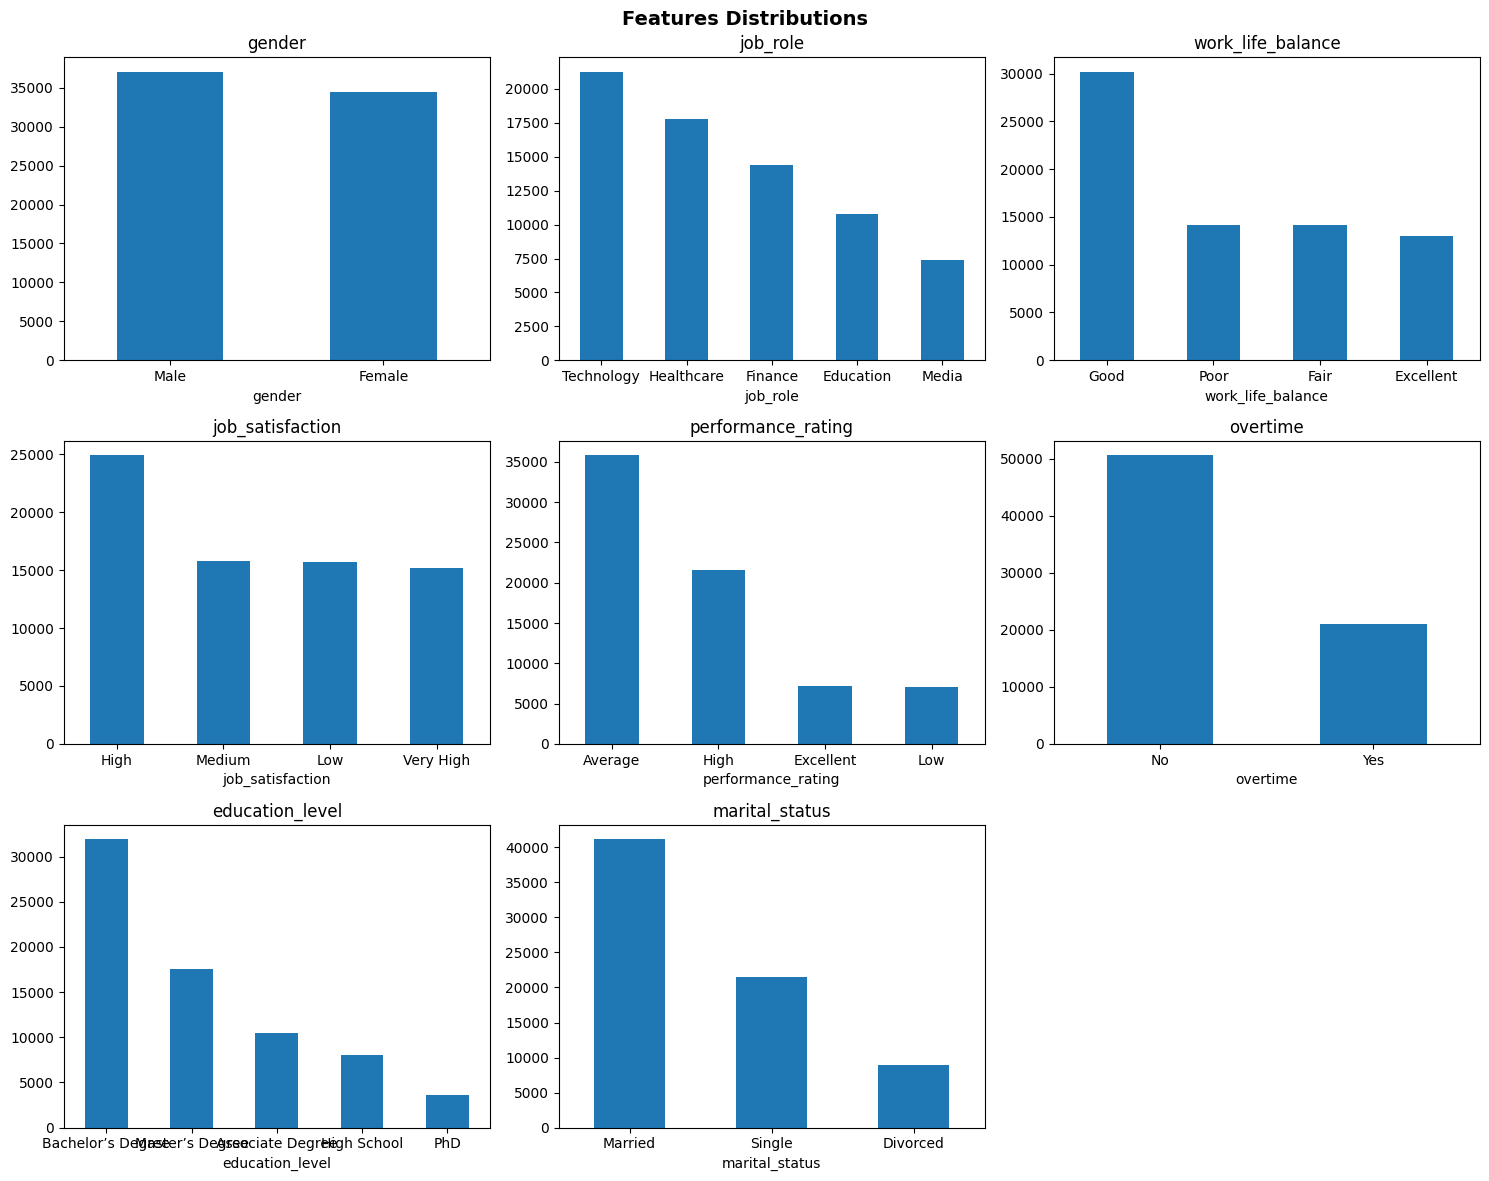

In [90]:
df_plotting =df.select_dtypes(include='object')
fig = plt.figure(figsize=(15, 12))
for i, column in enumerate(df_plotting.columns[0:8], 1):
    plt.subplot(3, 3, i)
    df[column].value_counts().plot(kind='bar')
    plt.title(column)
    plt.xticks(rotation = 0)
    plt.tight_layout()

fig.suptitle("Features Distributions", fontsize = 14, weight = "bold")
fig.tight_layout()
fig.show()

/tmp/ipykernel_4675/3125199667.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


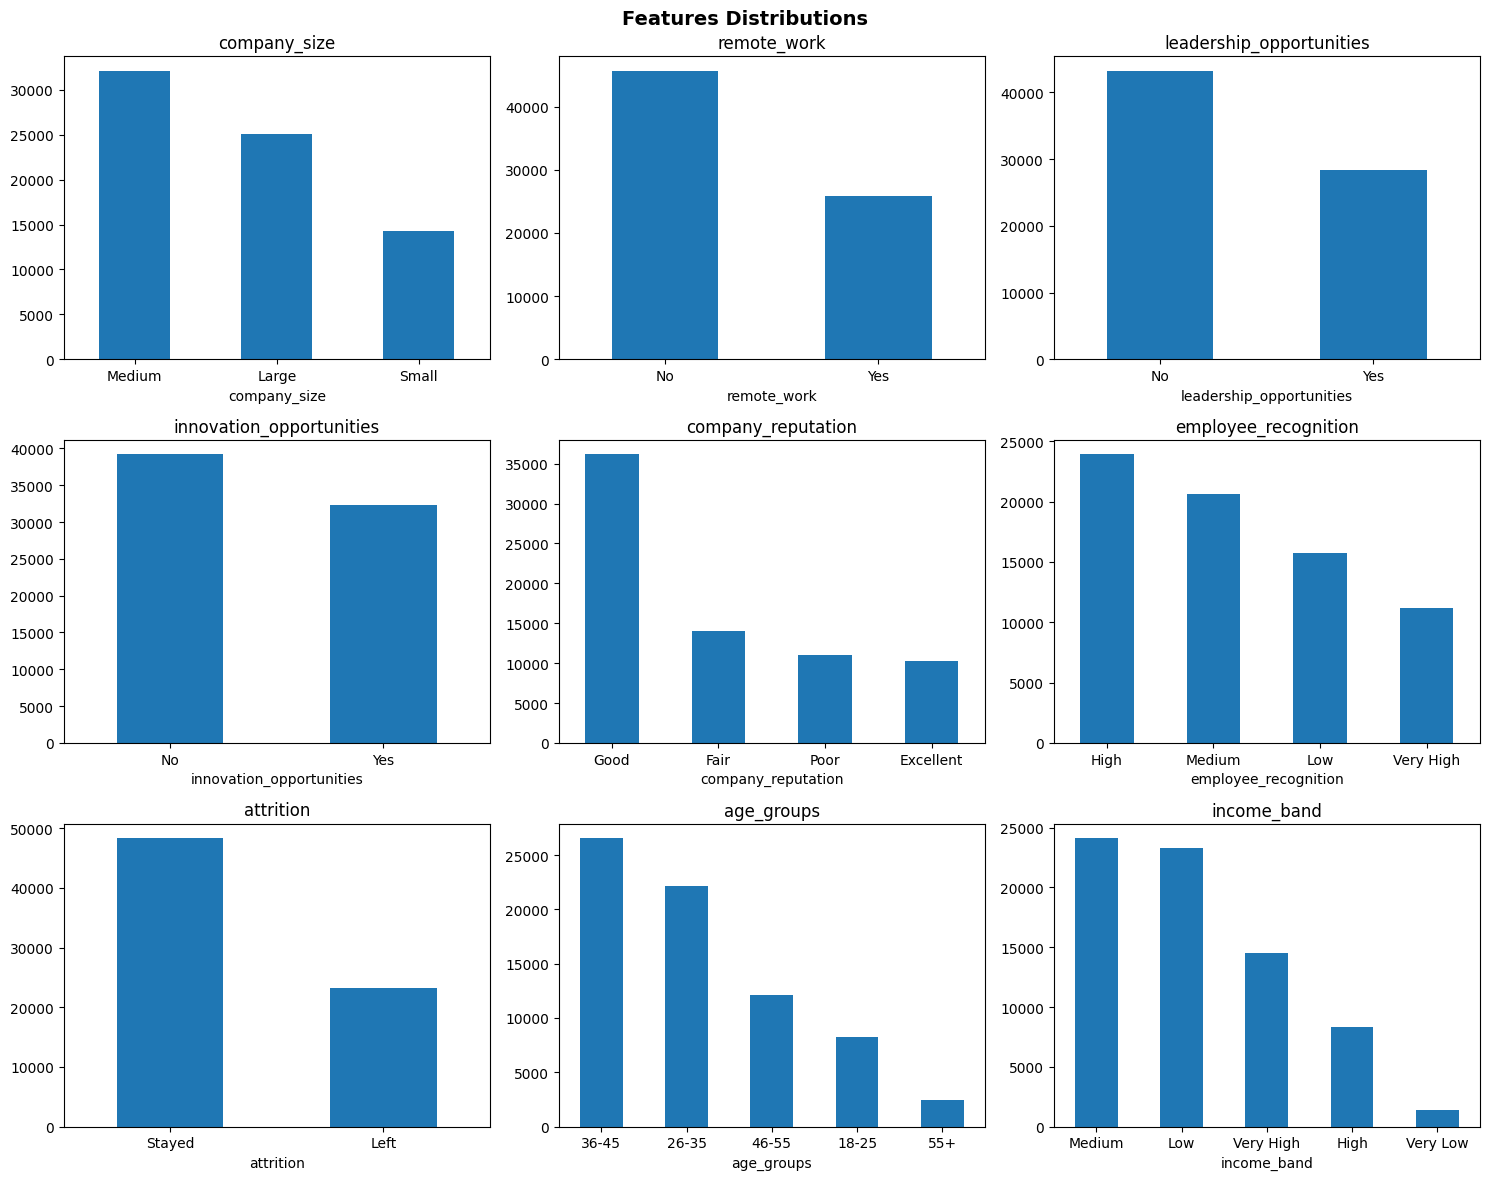

In [91]:
df_plotting =df.select_dtypes(include=['object', 'category'])
fig = plt.figure(figsize=(15, 12))
for i, column in enumerate(df_plotting.columns[9:], 1):
    plt.subplot(3, 3, i)
    df[column].value_counts().plot(kind='bar')
    plt.title(column)
    plt.xticks(rotation = 0)
    plt.tight_layout()

fig.suptitle("Features Distributions", fontsize = 14, weight = "bold")
fig.tight_layout()
fig.show()

#### Age

In [92]:
fig = px.histogram(df["age"])
fig.show()

#### Years at Compnay

In [93]:
fig = px.histogram(df["years_at_company"], labels= {"years_at_company": "Years at company"})
fig.show()

#### Monthly Income

In [94]:
fig = px.histogram(df["monthly_income"])
fig.show()

#### Overtime

In [95]:
jobRole_overtime = df.groupby(["overtime", "job_role"])["employee_id"].count().reset_index()
jobRole_overtime = jobRole_overtime.rename(columns={"employee_id": "count"})
fig = px.sunburst(
    jobRole_overtime,
    path=["overtime", "job_role"],  # hierarchy levels
    values="count",                 # size of each slice
    title="Job Role Distribution by Overtime"
)

fig.show()

In [96]:
fig = px.pie(df, names="age_groups", title="Age Groups")
fig.show()

In [97]:
# Select numeric columns (drop first column)
df_plotting = df.iloc[:, 1:].select_dtypes(include=["number"])

# Create a 2x4 subplot grid (adjust if you have more/less than 8 features)
rows, cols = 2, 4
fig = make_subplots(
    rows=rows,
    cols=cols,
    subplot_titles=df_plotting.columns,
    horizontal_spacing=0.08,
    vertical_spacing=0.15
)

# Add each boxplot
for i, column in enumerate(df_plotting.columns):
    r = i // cols + 1
    c = i % cols + 1
    fig.add_trace(
        go.Box(
            y=df_plotting[column],
            name=column,
            boxmean='sd',
            marker_color='rgb(0, 128, 255)',
            fillcolor='rgba(0,128,255,0.3)',
            line=dict(color='rgb(0, 80, 180)'),
        ),
        row=r, col=c
    )

# Update layout for beauty
fig.update_layout(
    height=700,
    width=1200,
    title=dict(
        text="Boxplots of Numeric Features (Interactive & Styled)",
        x=0.5,
        font=dict(size=20, family="Arial", color="black")
    ),
    showlegend=False,
    plot_bgcolor="white",
    paper_bgcolor="white",
    font=dict(size=12),
)

fig.update_yaxes(showgrid=True, gridcolor='lightgrey')
fig.update_xaxes(showticklabels=False)

fig.show()


In [98]:
df_new = df.copy()
df_new["attrition"] = np.where(df_new["attrition"] == "Left", 1, 0)

In [99]:
# Select only numeric columns
df_numeric = df_new.select_dtypes(include='number')

# Compute correlation matrix
corr = df_numeric.corr(method= "pearson")

# Create Plotly heatmap
fig = px.imshow(
    corr,
    text_auto=True,
    color_continuous_scale='RdBu_r',
    origin='lower',
    title="📊 Correlation Matrix (Plotly)"
)

# Beautify layout
fig.update_layout(
    title_x=0.5,
    width=800,
    height=700,
    coloraxis_colorbar=dict(title="Correlation"),
    font=dict(size=12),
    xaxis_showgrid=False,
    yaxis_showgrid=False,
)

fig.show()


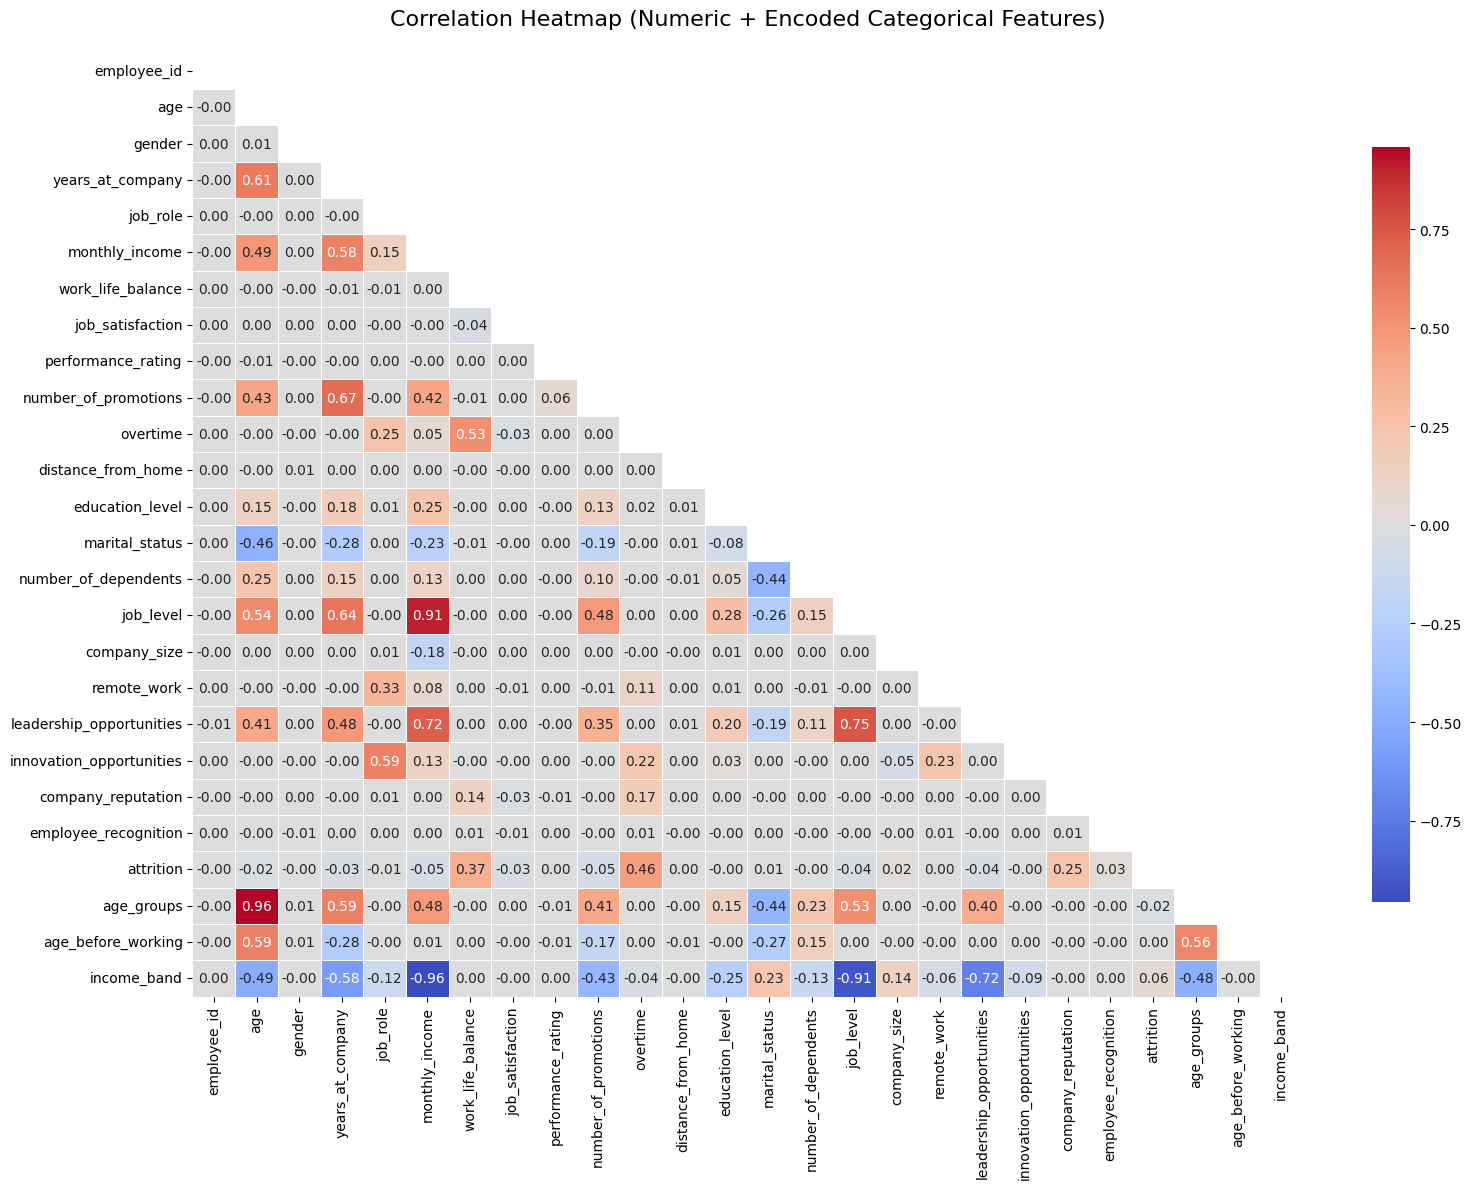

In [100]:
for col in df.select_dtypes(include=['object', 'category']).columns:
    df_new[col] = df_new[col].astype('category').cat.codes

# === Compute correlation matrix ===
corr_matrix = df_new.corr(numeric_only=True)

# === Create a mask for upper triangle (optional, for clarity) ===
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# === Plot the heatmap ===
plt.figure(figsize=(16, 12))
sns.heatmap(
    corr_matrix,
    mask=mask,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap (Numeric + Encoded Categorical Features)", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

In [101]:
import pandas as pd
from scipy.stats import pointbiserialr
from sklearn.feature_selection import mutual_info_classif

target_col = 'attrition'  # change this

numeric_cols = df_new.select_dtypes(include=['number']).columns.drop(target_col)

results = []

# Point-biserial correlation
for col in numeric_cols:
    r, p = pointbiserialr(df_new[target_col], df_new[col])
    results.append({'Feature': col, 'Correlation': r, 'P-value': p})

relation_df = pd.DataFrame(results)

# Mutual information
mi = mutual_info_classif(df_new[numeric_cols], df_new[target_col], random_state=0)
relation_df['Mutual Information'] = mi

# Sort by importance
relation_df = relation_df.sort_values(by='Mutual Information', ascending=False)

print(relation_df)

                     Feature  Correlation       P-value  Mutual Information
7           job_satisfaction    -0.031840  1.596937e-17            0.270415
6          work_life_balance     0.368921  0.000000e+00            0.237286
21      employee_recognition     0.026527  1.267797e-12            0.201558
20        company_reputation     0.246065  0.000000e+00            0.192793
10                  overtime     0.456381  0.000000e+00            0.103085
13            marital_status     0.009711  9.379860e-03            0.007436
2                     gender    -0.003120  4.038955e-01            0.006835
24               income_band     0.056734  4.145499e-52            0.005514
15                 job_level    -0.037009  4.002683e-23            0.004917
4                   job_role    -0.011741  1.683550e-03            0.004742
18  leadership_opportunities    -0.038699  3.902778e-25            0.004591
17               remote_work     0.004459  2.328982e-01            0.003364
16          

In [102]:
df.drop(columns="income_band", inplace=True)

In [104]:
df.sample(5)

employee_id  age  gender  years_at_company    job_role  monthly_income  \
47566        13029   44  Female                 4     Finance            7783   
17268        73104   45    Male                11   Education            9893   
46599        75401   30  Female                10     Finance           15291   
24117        73811   21  Female                 0  Healthcare            3608   
61941        49583   43  Female                 7  Healthcare            8895   

      work_life_balance job_satisfaction performance_rating  \
47566              Fair           Medium            Average   
17268              Good           Medium            Average   
46599              Good             High            Average   
24117              Fair              Low            Average   
61941              Poor              Low          Excellent   

       number_of_promotions  ... job_level  company_size remote_work  \
47566                     0  ...       Mid        Medium         Yes   
17268                     2  ...    Senior        Medium          No   
46599                     2  ...    Senior         Large         Yes   
24117                     0  ...     Entry         Small          No   
61941                     0  ...       Mid         Large          No   

      leadership_opportunities  innovation_opportunities company_reputation  \
47566                      Yes                        No               Good   
17268                      Yes                        No               Good   
46599                      Yes                        No               Good   
24117                       No                        No               Good   
61941                       No                       Yes               Fair   

      employee_recognition attrition age_groups age_before_working  
47566               Medium      Left      36-45                 40  
17268               Medium    Stayed      36-45                 34  
46599                 High    Stayed      26-35                 20  
24117                 High      Left      18-25                 21  
61941                  Low      Left      36-45                 36  

[5 rows x 25 columns]

In [105]:
df.shape

(71569, 25)

## **1. Advanced Data Analysis**

### **Statistical Tests & Feature Selection**

#### *1. Chi-Squared Test*

In [106]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Define target column
target = 'attrition'

# Ensure target exists
if target not in df.columns:
    raise ValueError(f"'{target}' column not found in DataFrame.")

# Store results
results = []

for col in categorical_cols:
    if col != target:
        contingency_table = pd.crosstab(df[col], df[target])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        significance = "✅" if p < 0.05 else "❌"
        results.append({
            'Feature': col,
            'Chi2': round(chi2, 3),
            'p-value': round(p, 5),
            'DOF': dof,
            'Significant': significance
        })

# Convert to DataFrame
chi_square_df = pd.DataFrame(results).sort_values(by='p-value')

# Display neatly
print("\n=== Chi-Square Test Results vs Attrition ===\n")
print(chi_square_df.to_string(index=False))


=== Chi-Square Test Results vs Attrition ===

                 Feature      Chi2  p-value  DOF Significant
                job_role    89.309  0.00000    4           ✅
       work_life_balance 31470.264  0.00000    3           ✅
        job_satisfaction 34990.416  0.00000    3           ✅
                overtime 14904.511  0.00000    1           ✅
      company_reputation 26391.894  0.00000    3           ✅
leadership_opportunities   107.015  0.00000    1           ✅
            company_size    41.403  0.00000    2           ✅
               job_level    98.118  0.00000    2           ✅
              age_groups    39.219  0.00000    4           ✅
    employee_recognition 26537.150  0.00000    3           ✅
         education_level    15.886  0.00318    4           ✅
          marital_status     7.103  0.02868    2           ✅
             remote_work     1.403  0.23616    1           ❌
                  gender     0.683  0.40840    1           ❌
innovation_opportunities     0.240  0.

In [107]:
# Select features based on chi-square test results
selected_features_chi_square = chi_square_df[chi_square_df['p-value'] < 0.05]['Feature'].tolist()

#### *2. T-test*

In [108]:
# Target column
target = 'attrition'

# Ensure target exists
if target not in df.columns:
    raise ValueError(f"'{target}' column not found in DataFrame.")

# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Ensure binary target (like Left/Stayed)
groups = df[target].unique()
if len(groups) != 2:
    raise ValueError(f"T-test requires a binary target variable, found: {groups}")

# Store results
results = []

for col in numeric_cols:
    group1 = df[df[target] == groups[0]][col].dropna()
    group2 = df[df[target] == groups[1]][col].dropna()
    
    t_stat, p_val = ttest_ind(group1, group2, equal_var=False)  # Welch’s t-test
    significance = "✅" if p_val < 0.05 else "❌"
    
    results.append({
        'Feature': col,
        'Group1_mean': round(group1.mean(), 3),
        'Group2_mean': round(group2.mean(), 3),
        'T-Statistic': round(t_stat, 3),
        'p-value': round(p_val, 5),
        'Significant': significance
    })

# Create DataFrame
t_test_df = pd.DataFrame(results).sort_values(by='p-value')

# Display results neatly
print("\n=== T-Test Results for Numerical Columns vs Attrition ===\n")
print(t_test_df.to_string(index=False))


=== T-Test Results for Numerical Columns vs Attrition ===

             Feature  Group1_mean  Group2_mean  T-Statistic  p-value Significant
                 age       37.132       37.628       -6.420  0.00000           ✅
    years_at_company        9.465       10.012       -8.473  0.00000           ✅
      monthly_income     7885.882     8283.960      -12.683  0.00000           ✅
number_of_promotions        1.456        1.688      -14.740  0.00000           ✅
         employee_id    44876.019    45066.081       -0.915  0.36024           ❌
  age_before_working       27.667       27.616        0.802  0.42283           ❌
  distance_from_home       19.440       19.397        0.381  0.70343           ❌
number_of_dependents        1.430        1.432       -0.254  0.79947           ❌


In [109]:
# Select features based on t-test results
selected_features_t_test = t_test_df[t_test_df['p-value'] < 0.05]['Feature'].tolist()

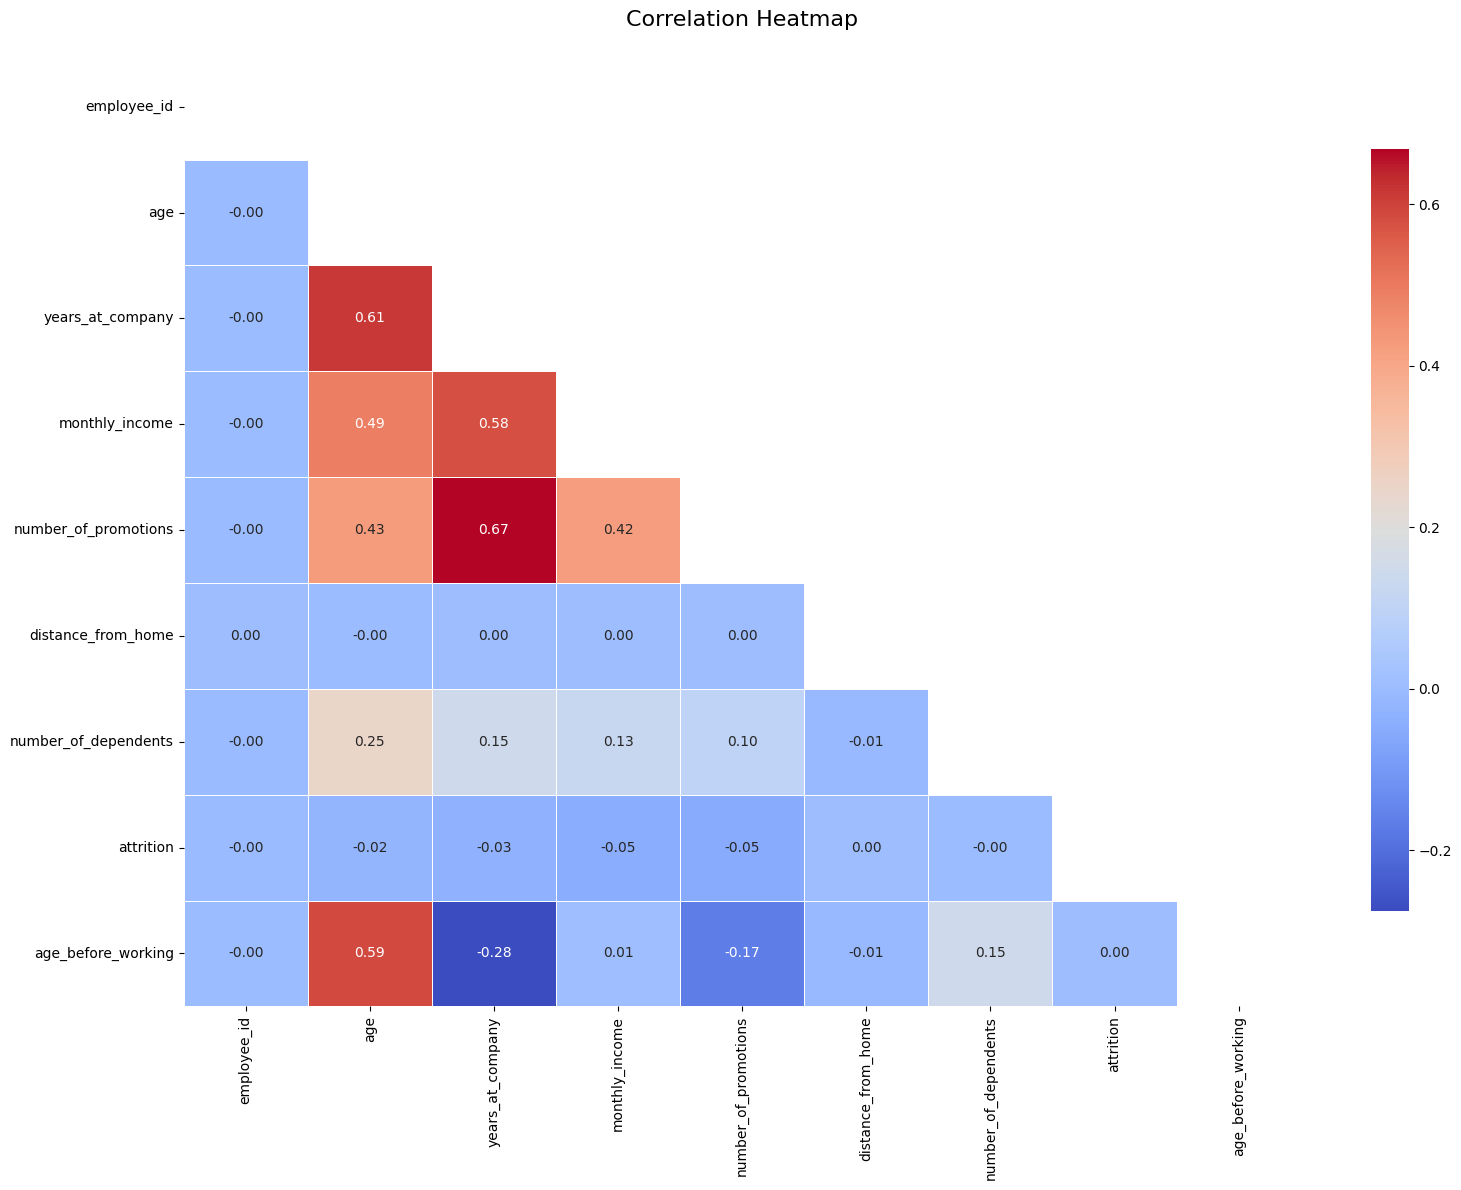

In [110]:
# Copy the dataframe to avoid modifying original
df_encoded = df.copy()

# Encode the tartget variable using label encoding
df_encoded['attrition'] = df_encoded['attrition'].map({'Stayed': 0, 'Left': 1})

# === Compute correlation matrix ===
corr_matrix = df_encoded.corr(numeric_only=True)

# === Create a mask for upper triangle (optional, for clarity) ===
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# === Plot the heatmap ===
plt.figure(figsize=(16, 12))
sns.heatmap(
    corr_matrix,
    mask=mask,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

In [111]:
selected_features = selected_features_chi_square + selected_features_t_test

In [112]:
df_selected = df[selected_features + ['attrition']]

In [113]:
df_selected.sample(5)

job_role work_life_balance job_satisfaction overtime  \
67825  Healthcare              Poor              Low      Yes   
59773  Technology              Poor              Low      Yes   
47592     Finance         Excellent           Medium       No   
14261       Media              Good           Medium       No   
4549   Technology              Good             High      Yes   

      company_reputation leadership_opportunities company_size job_level  \
67825               Fair                       No        Large     Entry   
59773               Poor                      Yes        Large    Senior   
47592               Good                      Yes        Small       Mid   
14261               Fair                      Yes        Small    Senior   
4549                Good                      Yes        Large    Senior   

      age_groups employee_recognition    education_level marital_status  age  \
67825      18-25                  Low   Associate Degree         Single   25   
59773        55+                  Low    Master’s Degree        Married   63   
47592      36-45               Medium  Bachelor’s Degree        Married   36   
14261      46-55                 High  Bachelor’s Degree        Married   46   
4549       26-35               Medium  Bachelor’s Degree        Married   29   

       years_at_company  monthly_income  number_of_promotions attrition  
67825                 3            4513                     1      Left  
59773                 9           17961                     1      Left  
47592                10            7830                     3    Stayed  
14261                14            9358                     4      Left  
4549                  5           15552                     0      Left

In [114]:
df_selected.shape

(71569, 17)

## **Feature Engineering**

### **Create New Features**

In [115]:
df_selected['years_at_company'].describe()

count    71569.000000
mean         9.834523
std          8.147361
min          0.000000
25%          3.000000
50%          8.000000
75%         15.000000
max         47.000000
Name: years_at_company, dtype: float64

In [116]:
df_selected['monthly_income'].describe()

count    71569.000000
mean      8154.795791
std       3972.528039
min       2410.000000
25%       4798.000000
50%       7345.000000
75%      10384.000000
max      19837.000000
Name: monthly_income, dtype: float64

In [117]:
# Create new features from old ones (boundries are the quartile values)
# 1️⃣ Tenure Categories
def tenure_category(years):
    if years < 3:
        return 'Short-term'
    elif 3 <= years < 15:
        return 'Medium-term'
    else:
        return 'Long-term'

df_selected['tenure_category'] = df_selected['years_at_company'].apply(tenure_category)

# 2️⃣ Salary Bands
def salary_band(income):
    if income < 4755:
        return 'Low'
    elif 4755 <= income < 10329:
        return 'Medium'
    else:
        return 'High'
    
df_selected['salary_band'] = df_selected['monthly_income'].apply(salary_band)

### Why these boundaries for Tenure and Salary Band?
We chose the tenure and salary band boundaries were chosen based on the dataset quartiles (approx Q1 and Q3) to create meaningful buckets for interpretation and business action:
- Tenure (years at company): Short-term (<3 years) captures very recent hires who commonly have higher churn; Medium-term (3–14 years) captures the majority of the workforce where retention programs and career progression matter; Long-term (>=15 years) typically represents stable employees or those near retirement. These breakpoints balance sample sizes and practical HR policy segments.
- Salary band (monthly income): Boundaries at 4755 and 10329 were chosen based on the dataset quartiles (approx Q1 and Q3) to create Low/Medium/High groups that map to lower, typical, and higher-paid employees. Using quartile-based bands helps highlight pay-related retention patterns while keeping groups sizable for statistical testing.
These categorical buckets make visual comparisons and targeted program suggestions easier and enable chi-square tests for association with attrition.

In [118]:
# Chi-square tests for association between tenure_category/salary_band and attrition
from scipy.stats import chi2_contingency

def run_chi2(cat_col, df=df_selected, target='attrition'):
    table = pd.crosstab(df[cat_col], df[target])
    chi2, p, dof, expected = chi2_contingency(table)
    print(f'Chi-square test for {cat_col} vs {target}:')
    print(table)
    print(f'chi2={chi2:.3f}, p-value={p:.5f}, dof={dof}')
    if p < 0.05:
        print('=> Statistically significant association (p < 0.05)')
    else:
        print('=> No statistically significant association detected (p >= 0.05)')
    print('')

run_chi2('tenure_category')
run_chi2('salary_band')

Chi-square test for tenure_category vs attrition:
attrition         Left  Stayed
tenure_category               
Long-term         5601   12830
Medium-term      12263   25732
Short-term        5358    9785
chi2=95.665, p-value=0.00000, dof=2
=> Statistically significant association (p < 0.05)

Chi-square test for salary_band vs attrition:
attrition     Left  Stayed
salary_band               
High          5303   12719
Low           6128   11447
Medium       11791   24181
chi2=123.867, p-value=0.00000, dof=2
=> Statistically significant association (p < 0.05)



#### We checked that the both of the new features show statistically significant association with attrition

In [119]:
df_selected.sample(10)

job_role work_life_balance job_satisfaction overtime  \
55434     Finance              Good        Very High       No   
49242     Finance              Good           Medium       No   
13561     Finance              Good           Medium       No   
14209  Technology              Good             High       No   
42184  Technology              Fair             High       No   
18901     Finance              Good             High       No   
69890  Healthcare              Good             High       No   
38945  Healthcare              Good           Medium       No   
28246     Finance              Good             High       No   
58299  Healthcare         Excellent             High       No   

      company_reputation leadership_opportunities company_size job_level  \
55434          Excellent                      Yes        Large    Senior   
49242               Good                      Yes        Large    Senior   
13561               Good                      Yes        Small    Senior   
14209               Good                       No        Large       Mid   
42184               Poor                       No        Large     Entry   
18901               Good                      Yes        Large    Senior   
69890          Excellent                       No        Small     Entry   
38945          Excellent                       No       Medium     Entry   
28246               Good                      Yes        Large    Senior   
58299          Excellent                       No        Small       Mid   

      age_groups employee_recognition    education_level marital_status  age  \
55434      36-45            Very High  Bachelor’s Degree        Married   45   
49242      46-55                  Low  Bachelor’s Degree        Married   50   
13561      36-45               Medium    Master’s Degree       Divorced   43   
14209      26-35               Medium   Associate Degree        Married   33   
42184      18-25                  Low  Bachelor’s Degree         Single   18   
18901      36-45               Medium  Bachelor’s Degree        Married   42   
69890      36-45            Very High  Bachelor’s Degree         Single   36   
38945      26-35               Medium  Bachelor’s Degree        Married   34   
28246      36-45            Very High  Bachelor’s Degree        Married   42   
58299      36-45                 High    Master’s Degree        Married   43   

       years_at_company  monthly_income  number_of_promotions attrition  \
55434                18           17971                     2    Stayed   
49242                21           14573                     8    Stayed   
13561                19           13067                     5    Stayed   
14209                 1           10463                     0    Stayed   
42184                 0            4542                     0      Left   
18901                23           14288                     1    Stayed   
69890                10            3088                     0    Stayed   
38945                11            3991                     1    Stayed   
28246                17           17356                     4    Stayed   
58299                24            6006                     0    Stayed   

      tenure_category salary_band  
55434       Long-term        High  
49242       Long-term        High  
13561       Long-term        High  
14209      Short-term        High  
42184      Short-term         Low  
18901       Long-term        High  
69890     Medium-term         Low  
38945     Medium-term         Low  
28246       Long-term        High  
58299       Long-term      Medium

In [120]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71569 entries, 0 to 71999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   job_role                  71569 non-null  object
 1   work_life_balance         71569 non-null  object
 2   job_satisfaction          71569 non-null  object
 3   overtime                  71569 non-null  object
 4   company_reputation        71569 non-null  object
 5   leadership_opportunities  71569 non-null  object
 6   company_size              71569 non-null  object
 7   job_level                 71569 non-null  object
 8   age_groups                71569 non-null  object
 9   employee_recognition      71569 non-null  object
 10  education_level           71569 non-null  object
 11  marital_status            71569 non-null  object
 12  age                       71569 non-null  int64 
 13  years_at_company          71569 non-null  int64 
 14  monthly_income            7

In [121]:
df_selected.select_dtypes(include='object')

job_role work_life_balance job_satisfaction overtime  \
0      Healthcare              Poor              Low      Yes   
1         Finance              Good           Medium       No   
2      Technology              Good        Very High       No   
3      Technology              Good             High       No   
4       Education              Good        Very High       No   
...           ...               ...              ...      ...   
71995     Finance         Excellent             High       No   
71996  Technology              Good        Very High      Yes   
71997  Healthcare              Good             High       No   
71998   Education         Excellent             High       No   
71999  Technology              Good           Medium      Yes   

      company_reputation leadership_opportunities company_size job_level  \
0                   Poor                       No        Small     Entry   
1                   Good                      Yes        Large    Senior   
2              Excellent                      Yes        Small    Senior   
3                   Good                      Yes       Medium       Mid   
4                   Good                       No        Large       Mid   
...                  ...                      ...          ...       ...   
71995               Good                       No       Medium     Entry   
71996               Good                       No        Large       Mid   
71997               Good                       No       Medium     Entry   
71998               Good                       No       Medium       Mid   
71999               Good                       No        Small     Entry   

      age_groups employee_recognition    education_level marital_status  \
0          18-25                  Low   Associate Degree         Single   
1          26-35                 High    Master’s Degree         Single   
2          36-45                 High                PhD        Married   
3          36-45                 High  Bachelor’s Degree        Married   
4          36-45            Very High  Bachelor’s Degree        Married   
...          ...                  ...                ...            ...   
71995      18-25               Medium    Master’s Degree         Single   
71996      36-45            Very High  Bachelor’s Degree        Married   
71997      18-25               Medium   Associate Degree         Single   
71998      46-55                 High        High School       Divorced   
71999      36-45                 High        High School        Married   

      attrition tenure_category salary_band  
0          Left      Short-term         Low  
1        Stayed     Medium-term        High  
2        Stayed       Long-term        High  
3        Stayed     Medium-term      Medium  
4        Stayed     Medium-term      Medium  
...         ...             ...         ...  
71995    Stayed      Short-term         Low  
71996    Stayed      Short-term      Medium  
71997    Stayed     Medium-term         Low  
71998    Stayed       Long-term      Medium  
71999      Left      Short-term         Low  

[71569 rows x 15 columns]

`Label Encoding`
1. work_life_balance
2. job_satisfaction
3. overtime	
4. job_level	
5. company_size
6. leadership_opportunities
7. company_reputation
8. employee_recognition
9. age_groups
10. education_level
11. attrition
12. tenure_category
13. salary_band

`One hot Encoding`
1. job_role
2. marital_status

In [122]:
label_encode_cols = [
    'work_life_balance', 'job_satisfaction', 'overtime', 'job_level',
    'company_size', 'leadership_opportunities', 'company_reputation',
    'employee_recognition', 'age_groups', 'education_level',
    'attrition', 'tenure_category', 'salary_band'
]

onehot_encode_cols = ['job_role', 'marital_status']

# --- 2️⃣ Apply Label Encoding ---
le = LabelEncoder()

# Apply label encoding to each appropriate column
for col in label_encode_cols:
    if col in df_selected.columns:
        df_selected[col] = le.fit_transform(df_selected[col].astype(str))

# --- 3️⃣ Apply One-Hot Encoding ---
df_encoded = pd.get_dummies(df_selected, columns=onehot_encode_cols, drop_first=True)
df_encoded = df_encoded.astype(int)

In [123]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71569 entries, 0 to 71999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   work_life_balance         71569 non-null  int64
 1   job_satisfaction          71569 non-null  int64
 2   overtime                  71569 non-null  int64
 3   company_reputation        71569 non-null  int64
 4   leadership_opportunities  71569 non-null  int64
 5   company_size              71569 non-null  int64
 6   job_level                 71569 non-null  int64
 7   age_groups                71569 non-null  int64
 8   employee_recognition      71569 non-null  int64
 9   education_level           71569 non-null  int64
 10  age                       71569 non-null  int64
 11  years_at_company          71569 non-null  int64
 12  monthly_income            71569 non-null  int64
 13  number_of_promotions      71569 non-null  int64
 14  attrition                 71569 non-null  i

In [124]:
df_encoded.sample(5)

work_life_balance  job_satisfaction  overtime  company_reputation  \
47068                  2                 2         0                   2   
47475                  1                 2         0                   2   
5514                   2                 0         0                   2   
19457                  2                 0         0                   2   
60282                  0                 0         0                   2   

       leadership_opportunities  company_size  job_level  age_groups  \
47068                         0             0          1           1   
47475                         1             1          1           1   
5514                          1             0          2           4   
19457                         0             2          1           2   
60282                         1             1          2           2   

       employee_recognition  education_level  ...  number_of_promotions  \
47068                     2                1  ...                     0   
47475                     2                1  ...                     1   
5514                      0                1  ...                     6   
19457                     3                1  ...                     1   
60282                     0                1  ...                     6   

       attrition  tenure_category  salary_band  job_role_Finance  \
47068          1                1            2                 0   
47475          1                1            2                 1   
5514           1                0            0                 1   
19457          1                0            2                 0   
60282          1                0            0                 0   

       job_role_Healthcare  job_role_Media  job_role_Technology  \
47068                    0               0                    0   
47475                    0               0                    0   
5514                     0               0                    0   
19457                    0               0                    0   
60282                    1               0                    0   

       marital_status_Married  marital_status_Single  
47068                       1                      0  
47475                       1                      0  
5514                        0                      0  
19457                       1                      0  
60282                       0                      1  

[5 rows x 23 columns]

### **Scaling**

In [125]:
# 🧮 Define the columns for each scaling type
standard_scale_cols = ['age' ]
minmax_scale_cols = ['years_at_company', 'monthly_income', 'number_of_promotions']

# Copy dataframe to avoid overwriting original
df_scaled = df_encoded.copy()

# ⚙️ Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# 🧠 Apply StandardScaler
df_scaled[standard_scale_cols] = standard_scaler.fit_transform(df_scaled[standard_scale_cols])

# 💵 Apply MinMaxScaler
df_scaled[minmax_scale_cols] = minmax_scaler.fit_transform(df_scaled[minmax_scale_cols])

# ✅ Check the scaled results
df_scaled.head()

work_life_balance  job_satisfaction  overtime  company_reputation  \
0                  3                 1         1                   3   
1                  2                 2         0                   2   
2                  2                 3         0                   0   
3                  2                 0         0                   2   
4                  2                 3         0                   2   

   leadership_opportunities  company_size  job_level  age_groups  \
0                         0             2          0           0   
1                         1             0          2           1   
2                         1             2          2           2   
3                         1             1          1           2   
4                         0             0          1           2   

   employee_recognition  education_level  ...  number_of_promotions  \
0                     1                0  ...                0.0000   
1                     0                3  ...                0.1875   
2                     0                4  ...                0.2500   
3                     0                1  ...                0.0625   
4                     3                1  ...                0.0625   

   attrition  tenure_category  salary_band  job_role_Finance  \
0          0                2            1                 0   
1          1                1            0                 1   
2          1                0            0                 0   
3          1                1            2                 0   
4          1                1            2                 0   

   job_role_Healthcare  job_role_Media  job_role_Technology  \
0                    1               0                    0   
1                    0               0                    0   
2                    0               0                    1   
3                    0               0                    1   
4                    0               0                    0   

   marital_status_Married  marital_status_Single  
0                       0                      1  
1                       0                      1  
2                       1                      0  
3                       1                      0  
4                       1                      0  

[5 rows x 23 columns]

## **3. Data Visualization**

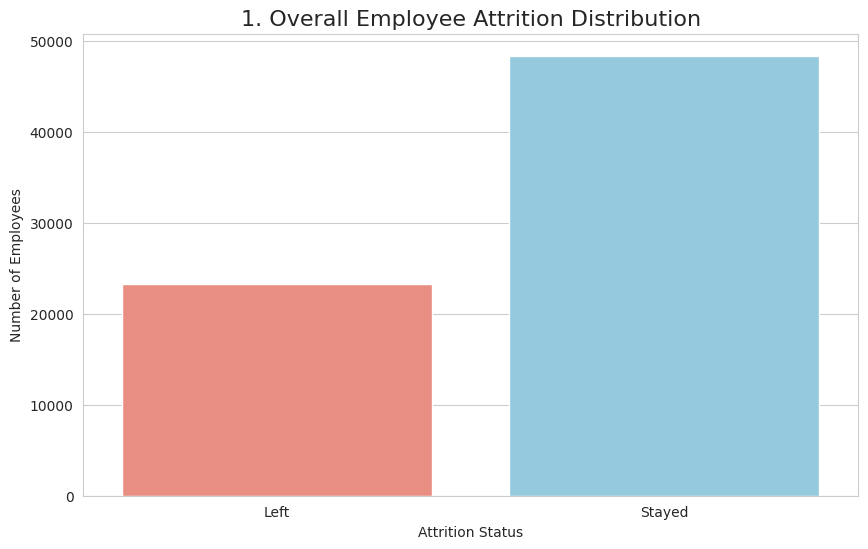

In [126]:
# --- Plotting Setup ---
sns.set_style("whitegrid")
palette_colors = {"Stayed": "skyblue", "Left": "salmon"}

# --- Visualization 1: Overall Attrition ---
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='attrition', palette=palette_colors)
plt.title('1. Overall Employee Attrition Distribution', fontsize=16)
plt.xlabel('Attrition Status')
plt.ylabel('Number of Employees')
plt.show()

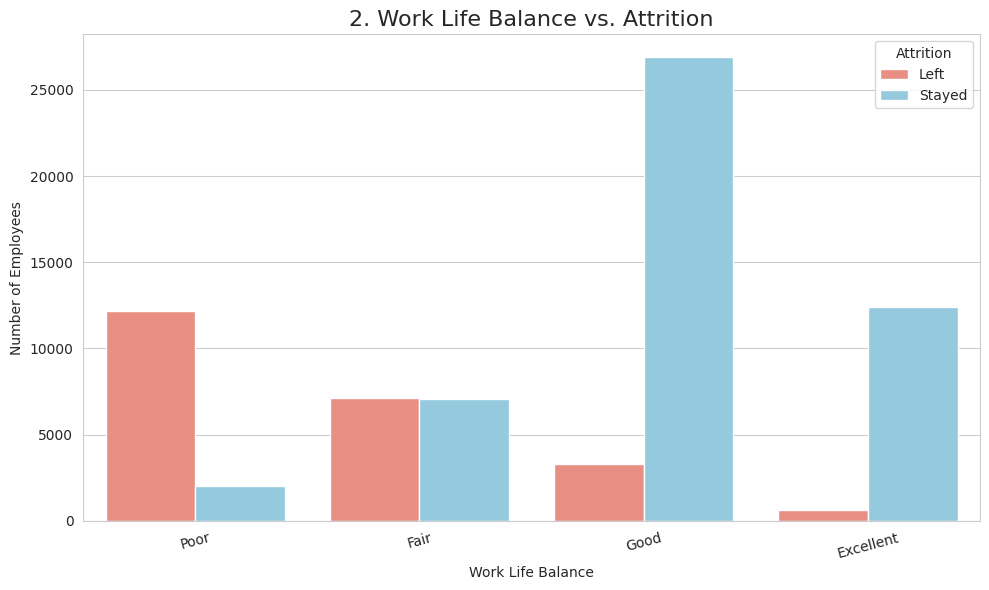

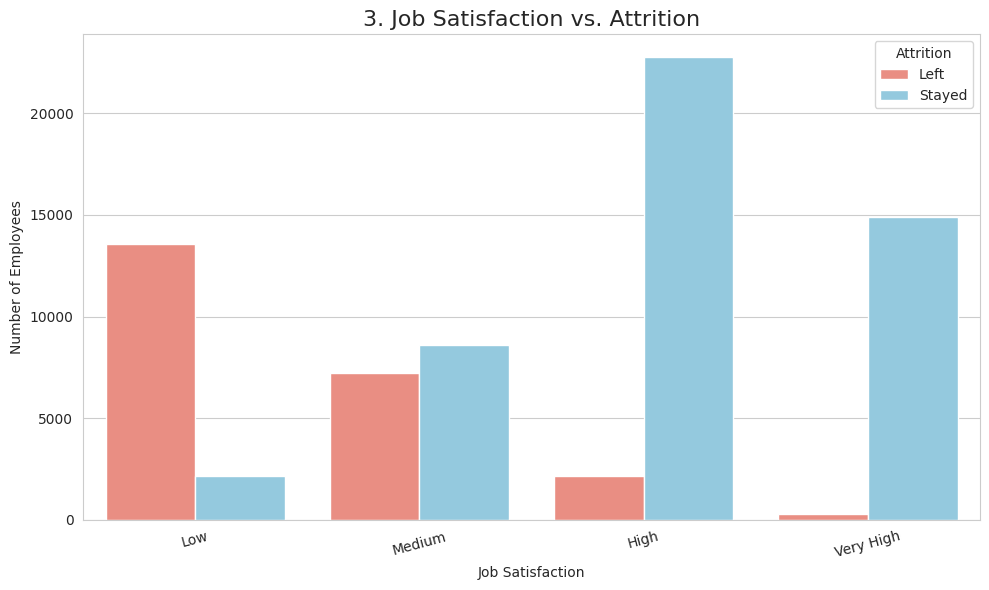

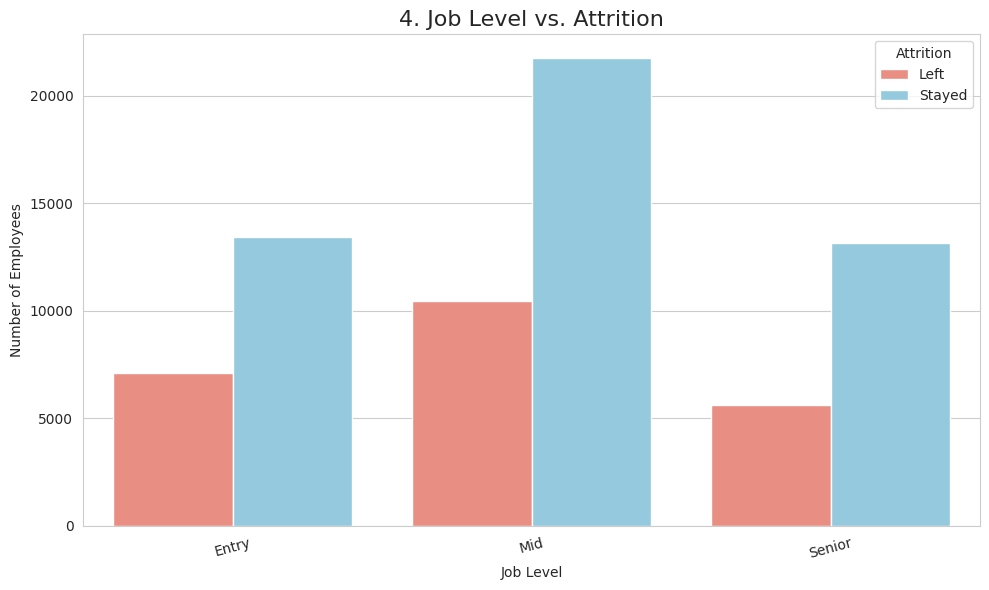

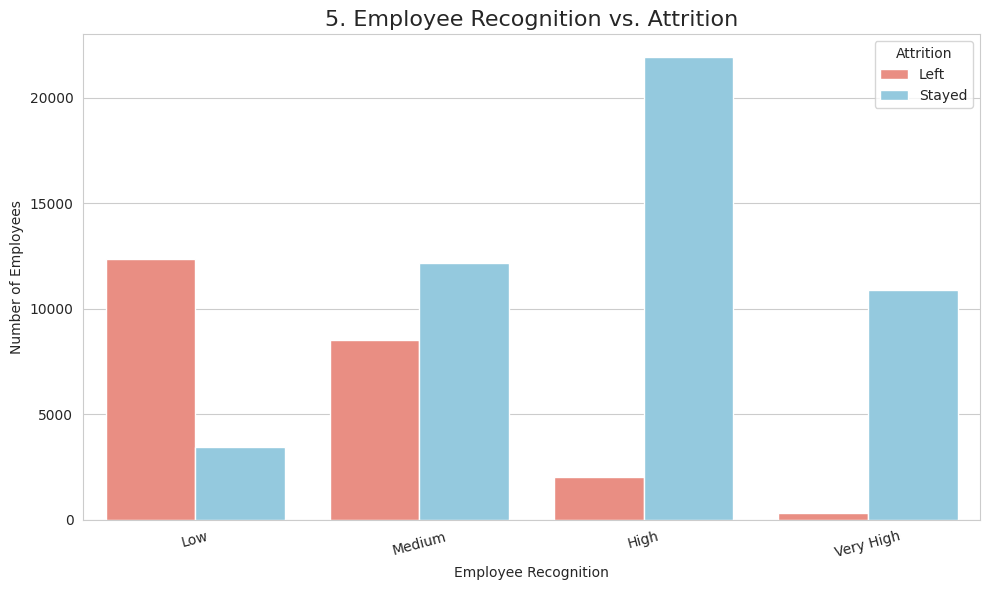

In [127]:
# --- Visualizations 2-5: Categorical Features ---
categorical_features = ['work_life_balance', 'job_satisfaction', 'job_level', 'employee_recognition']
for i, feature in enumerate(categorical_features, 2):
    plt.figure(figsize=(10, 6))
    order = None
    if feature == 'work_life_balance': order = ['Poor', 'Fair', 'Good', 'Excellent']
    elif feature == 'job_satisfaction': order = ['Low', 'Medium', 'High', 'Very High']
    elif feature == 'job_level': order = ['Entry', 'Mid', 'Senior']
    elif feature == 'employee_recognition': order = ['Low', 'Medium', 'High', 'Very High']
    
    sns.countplot(data=df, x=feature, hue='attrition', palette=palette_colors, order=order)
    plt.title(f'{i}. {feature.replace("_", " ").title()} vs. Attrition', fontsize=16)
    plt.xlabel(feature.replace("_", " ").title())
    plt.ylabel('Number of Employees')
    plt.legend(title='Attrition')
    plt.xticks(rotation=15)
    plt.tight_layout()
    plt.show()


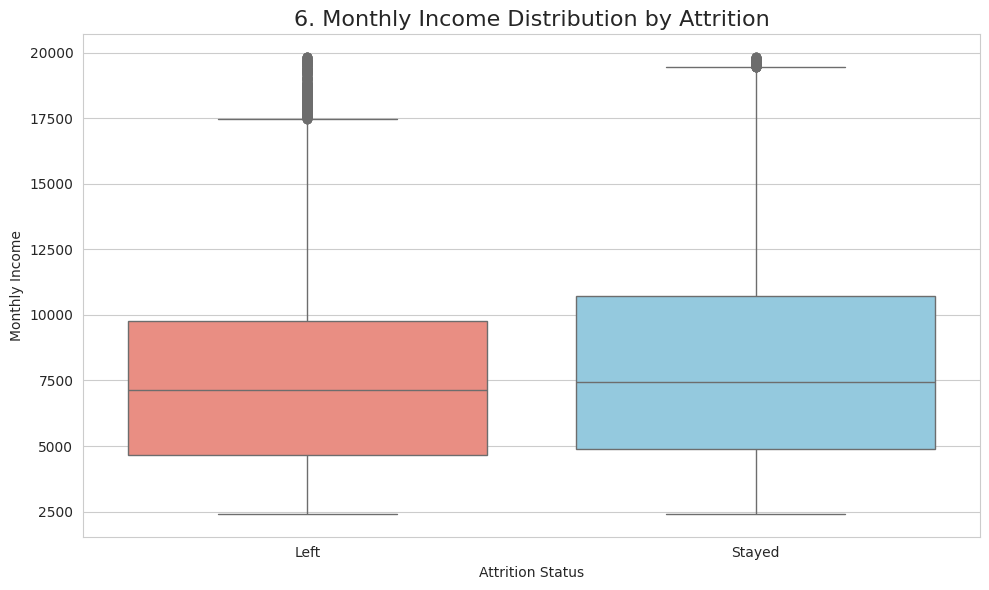

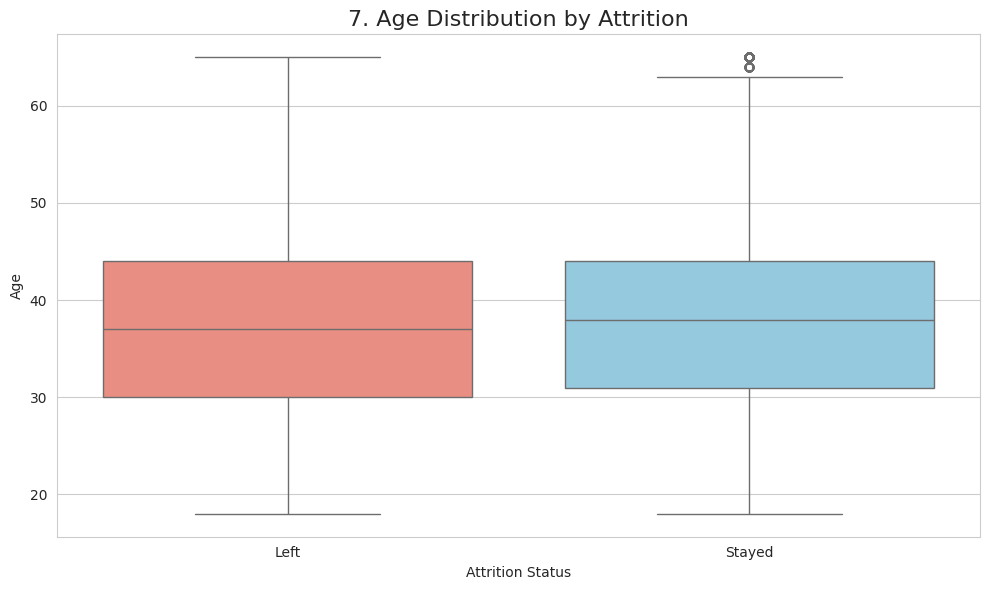

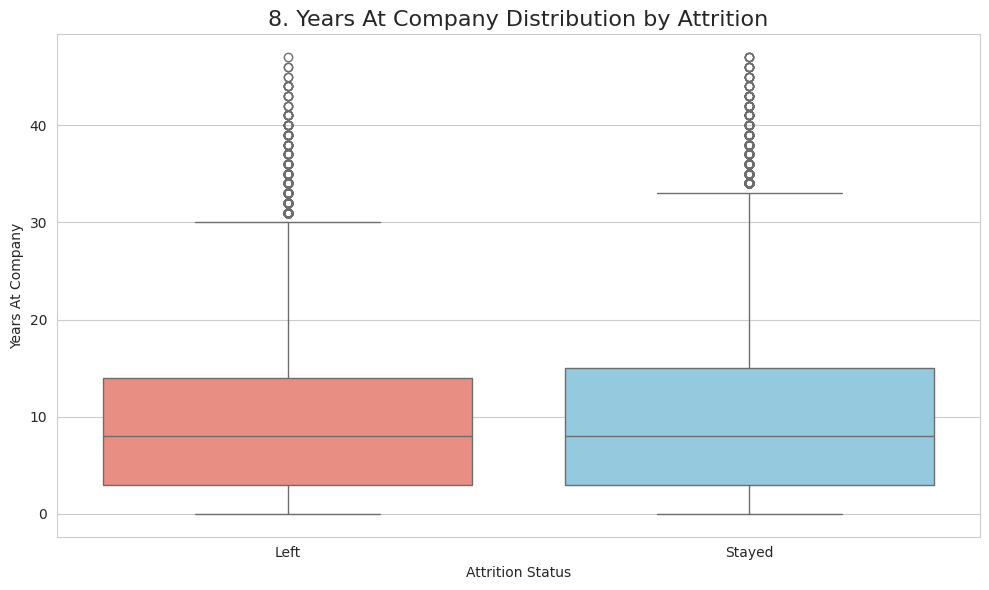

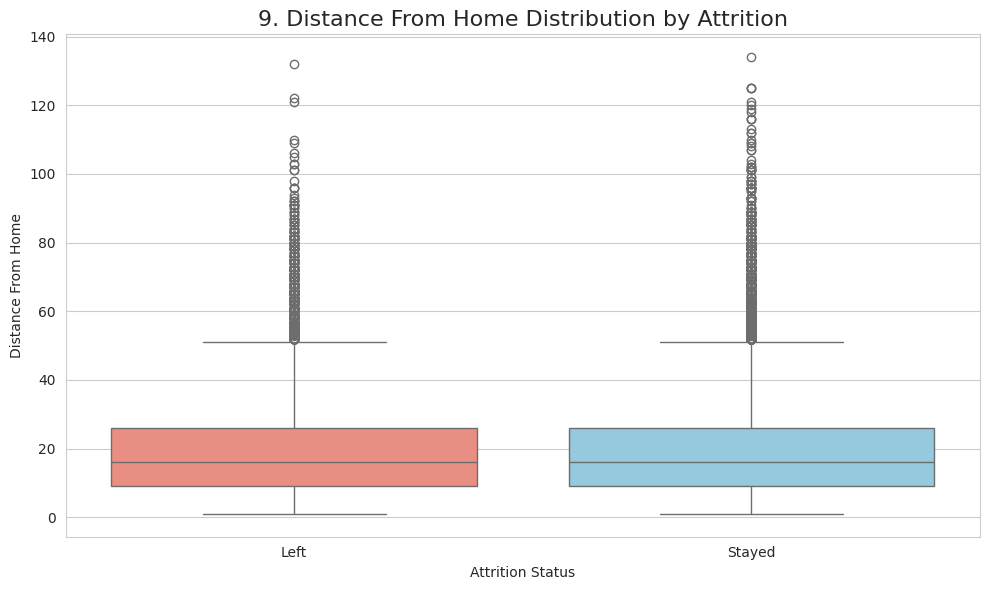

In [128]:
# --- Visualizations 6-9: Numerical Features (Box Plots) ---
numerical_features = ['monthly_income', 'age', 'years_at_company', 'distance_from_home']
for i, feature in enumerate(numerical_features, 6):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='attrition', y=feature, palette=palette_colors)
    plt.title(f'{i}. {feature.replace("_", " ").title()} Distribution by Attrition', fontsize=16)
    plt.xlabel('Attrition Status')
    plt.ylabel(feature.replace("_", " ").title())
    plt.tight_layout()
    plt.show()    

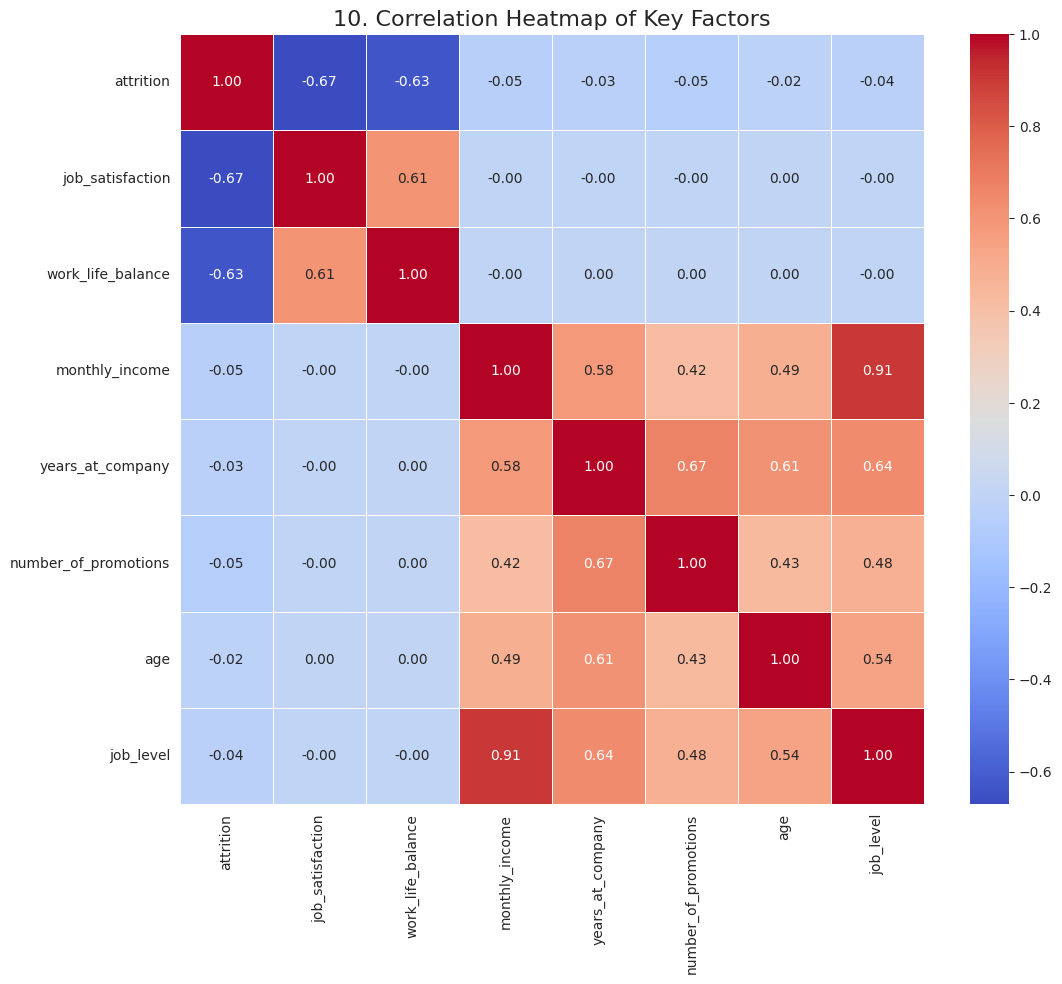

In [129]:
# --- Visualization 10: Correlation Heatmap ---
df_corr = df.copy()
df_corr['attrition'] = df_corr['attrition'].map({'Stayed': 0, 'Left': 1})
mappings = {
    'work_life_balance': {'Poor': 0, 'Fair': 1, 'Good': 2, 'Excellent': 3},
    'job_satisfaction': {'Low': 0, 'Medium': 1, 'High': 2, 'Very High': 3},
    'job_level': {'Entry': 0, 'Mid': 1, 'Senior': 2},
    'employee_recognition': {'Low': 0, 'Medium': 1, 'High': 2, 'Very High': 3}
}
for col, mapping in mappings.items():
    if col in df_corr.columns:
        df_corr[col] = df_corr[col].map(mapping)

# We select only the most relevant columns for a cleaner heatmap
relevant_cols = ['attrition', 'job_satisfaction', 'work_life_balance', 'monthly_income', 
                 'years_at_company', 'number_of_promotions', 'age', 'job_level']
correlation_matrix = df_corr[relevant_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('10. Correlation Heatmap of Key Factors', fontsize=16)
plt.show()

## Advanced Visualizations
Here we add a few deeper plots to explore relationships between tenure, salary bands, job roles, and attrition. These use seaborn/matplotlib for static plots and Plotly for an interactive treemap.

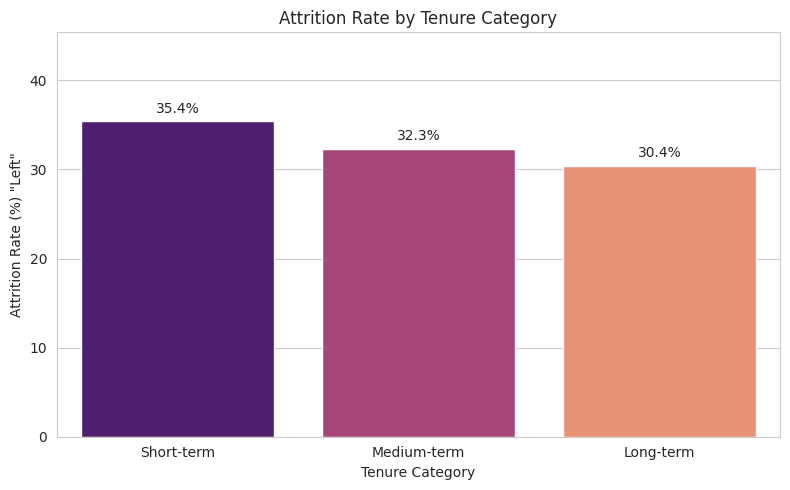

In [130]:
# 1) Attrition rate by Tenure Category (percent)
# Recreate tenure categories on the original df to avoid depending on encoding steps
def tenure_category(years):
    if years < 3:
        return 'Short-term'
    elif 3 <= years < 15:
        return 'Medium-term'
    else:
        return 'Long-term'

analysis_df = df.copy()
analysis_df['tenure_category'] = analysis_df['years_at_company'].apply(tenure_category)
analysis_df['attrition_left'] = (analysis_df['attrition'] == 'Left').astype(int)
tenure_rates = analysis_df.groupby('tenure_category')['attrition_left'].mean().reindex(['Short-term','Medium-term','Long-term']) * 100

plt.figure(figsize=(8,5))
sns.barplot(x=tenure_rates.index, y=tenure_rates.values, palette='magma')
plt.ylabel('Attrition Rate (%) "Left"')
plt.xlabel('Tenure Category')
plt.title('Attrition Rate by Tenure Category')
for i, v in enumerate(tenure_rates.values):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center')
plt.ylim(0, max(tenure_rates.values) + 10)
plt.tight_layout()
plt.show()

**Insight — Attrition Rate by Tenure Category**:
- Short-term employees tend to have the highest attrition rate, which suggests onboarding and early engagement are critical.
- Medium-term employees may show moderate attrition tied to career progression and recognition.
- Long-term employees usually have the lowest attrition — retention here is often driven by late-career benefits and stability.
Actionable: Focus retention efforts on the first 3 years with mentorship, clearer career paths, and early recognition.

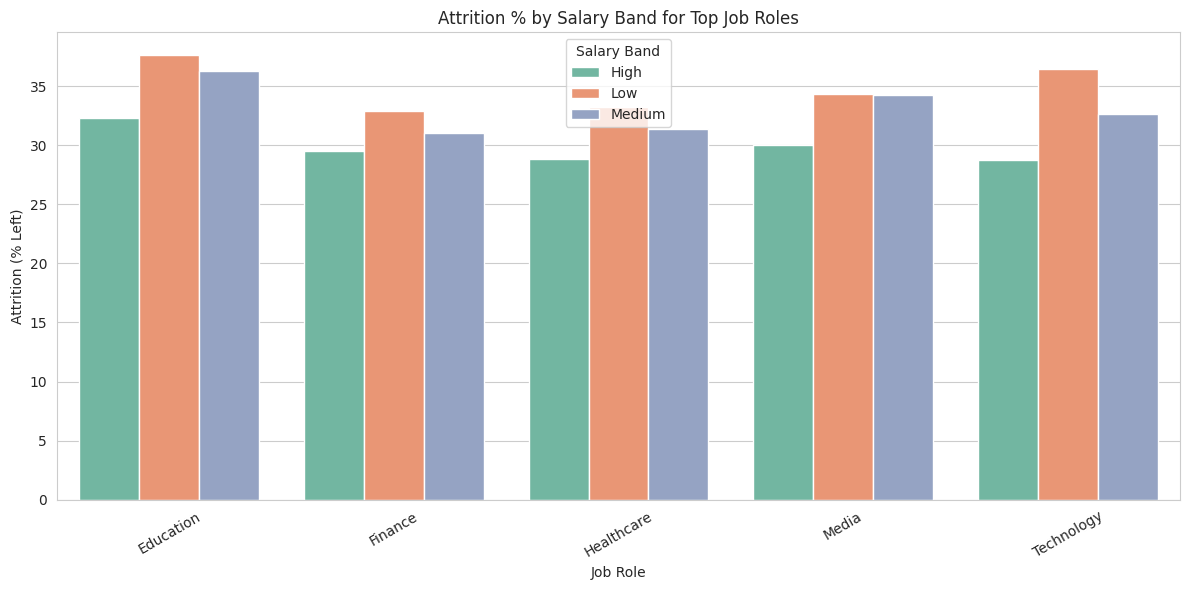

In [131]:
# 2) Salary Band vs Job Role — stacked/grouped view of attrition proportions
# Build counts and normalize within job_role to show distribution across salary bands and attrition
analysis_df['salary_band'] = analysis_df['monthly_income'].apply(lambda income: 'Low' if income < 4755 else ('Medium' if income < 10329 else 'High'))
pivot = pd.crosstab([analysis_df['job_role'], analysis_df['salary_band']], analysis_df['attrition']).reset_index()
pivot.columns.name = None
# compute percent Left within each job_role x salary_band group
pivot['total'] = pivot['Left'] + pivot['Stayed'] if 'Left' in pivot.columns and 'Stayed' in pivot.columns else pivot.iloc[:,2:].sum(axis=1)
pivot['left_pct'] = 100 * pivot['Left'] / pivot['total']

# Plot: for clarity show grouped barplot of left_pct by salary_band for top job roles by count
top_roles = analysis_df['job_role'].value_counts().nlargest(6).index.tolist()
plot_df = pivot[pivot['job_role'].isin(top_roles)]
plt.figure(figsize=(12,6))
sns.barplot(data=plot_df, x='job_role', y='left_pct', hue='salary_band', palette='Set2')
plt.ylabel('Attrition (% Left)')
plt.xlabel('Job Role')
plt.title('Attrition % by Salary Band for Top Job Roles')
plt.legend(title='Salary Band')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

**Insight — Attrition % by Salary Band for Top Job Roles**:
- Comparing salary bands within job roles shows whether low/medium paid people in the same role are more likely to leave.
- If Low band employees in specific roles have notably higher attrition, consider targeted pay adjustments or career progression pathways for those roles.
Actionable: Prioritize compensation reviews for job roles where Low/Medium bands show elevated attrition.

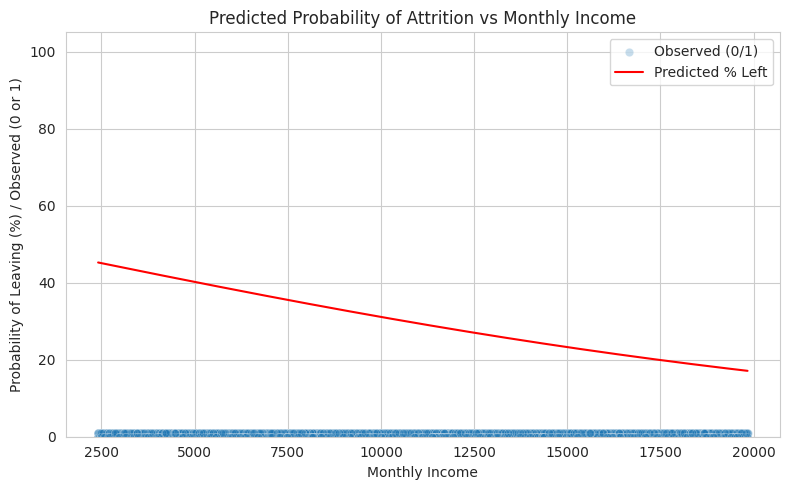

In [132]:
# 3) Logistic regression: probability of leaving vs monthly income (visualized)
from sklearn.linear_model import LogisticRegression
# Prepare data
X = analysis_df[['monthly_income']].fillna(analysis_df['monthly_income'].median())
y = analysis_df['attrition_left']
model = LogisticRegression(solver='liblinear')
model.fit(X, y)
# Predict across income range
income_range = np.linspace(X['monthly_income'].min(), X['monthly_income'].max(), 300).reshape(-1,1)
probs = model.predict_proba(income_range)[:,1] * 100

plt.figure(figsize=(8,5))
sns.scatterplot(data=analysis_df, x='monthly_income', y='attrition_left', alpha=0.25, label='Observed (0/1)')
sns.lineplot(x=income_range.flatten(), y=probs, color='red', label='Predicted % Left')
plt.ylabel('Probability of Leaving (%) / Observed (0 or 1)')
plt.xlabel('Monthly Income')
plt.title('Predicted Probability of Attrition vs Monthly Income')
plt.ylim(-0.05, 105)
plt.legend()
plt.tight_layout()
plt.show()

**Insight — Predicted Probability of Attrition vs Monthly Income**:
- The logistic curve visualizes how monthly income alone correlates with leaving probability. Look for non-linear patterns (e.g., higher leaving probability at lower incomes).
- Use this in combination with role-level views: a high predicted probability at a certain income range for high-turnover roles signals compensation-driven churn.
Actionable: Use predicted probability to prioritize salary ranges for intervention and to inform compensation benchmarking.

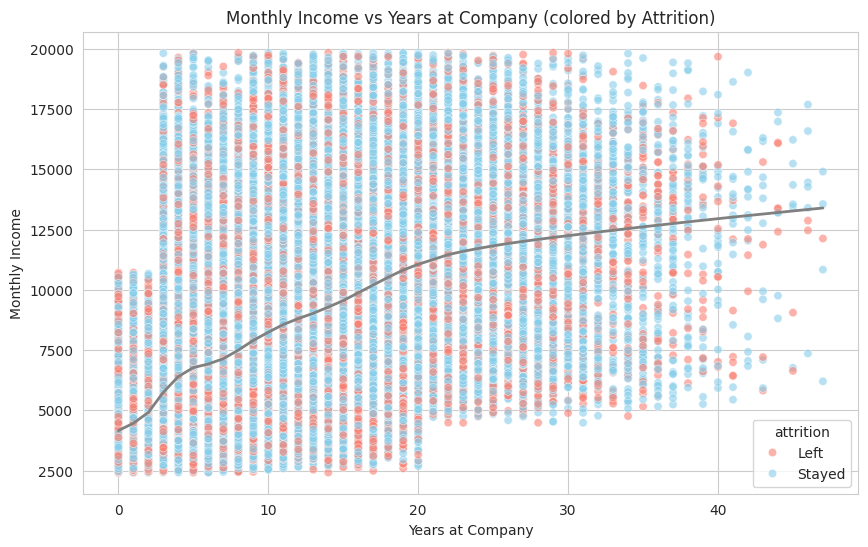

In [151]:
from statsmodels.nonparametric.smoothers_lowess import lowess

x = analysis_df['years_at_company']
y = analysis_df['monthly_income']

smooth = lowess(y, x, frac=0.3)

plt.figure(figsize=(10,6))

sns.scatterplot(
    data=analysis_df,
    x='years_at_company',
    y='monthly_income',
    hue='attrition',
    alpha=0.6,
    palette=palette_colors
)

plt.plot(smooth[:,0], smooth[:,1], linewidth=2, color='gray')
plt.xlabel('Years at Company')
plt.ylabel('Monthly Income')
plt.title('Monthly Income vs Years at Company (colored by Attrition)')
plt.show()

#### Employees with long tenure but low income show higher attrition risk.
**Insight — Monthly Income vs Years at Company (colored by Attrition)**:
- The scatter plot reveals whether tenure correlates with pay progression and whether employees who leave cluster in particular parts of the tenure-income space.
- A flat or downward trend in income with tenure for leavers would indicate pay progression issues.
Actionable: Review promotion/raise cadence for cohorts with low income growth and high attrition.

In [152]:
# 5) Plotly Treemap: Job Role -> Attrition counts (interactive)
df_counts = analysis_df.groupby(['job_role','attrition']).size().reset_index(name='count')
try:
    fig = px.treemap(df_counts, path=['job_role','attrition'], values='count', color='count', color_continuous_scale='Viridis')
    fig.update_layout(title='Treemap of Job Role and Attrition (counts)')
    fig.show()
except Exception as e:
    print('Plotly display failed in this environment — create the figure object and display in an interactive notebook.', e)

**Insight — Treemap of Job Role and Attrition**:
- The treemap highlights which job roles contribute the most to attrition by area size and shows the attrition split inside each role.
- This is useful to quickly spot roles where the absolute number of leavers is high even if the percentage isn't.
Actionable: Combine treemap findings with percentage charts to prioritize interventions by either impact (count) or severity (rate).

- Salary band effects: inspect roles where Low/Medium income shows higher leaving rates — targeted compensation reviews may help.
- The logistic regression curve shows how probability of leaving varies with monthly income; use it together with job role stratification to refine pay strategy.
- Work-life balance and job satisfaction are strong categorical signals: improvements here likely reduce attrition.
